In [39]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from src.run_gsort_v2_wuericmod import *
import src.utilities.electrode_map as emap
from src.eierflib import smart_fit, sigmoid
import src.post_processing_utils as gpa
import pandas as pd
# from run_gsort_v2_wuericmod import *
# import gsort_post_analysis as gpa

In [40]:
rdf = pd.read_csv('/home/jdotcafe/jeffbrown/electrical_spike_sorting/e-stim-spike-sorting/gsort-notebooks/central_retina_analysis.zip')

In [41]:
pdf = pd.read_csv('/home/jdotcafe/jeffbrown/electrical_spike_sorting/e-stim-spike-sorting/gsort-notebooks/sasi-peripheral-analysis-data/peripheral_retina_analysis.zip')

In [42]:
pdf.keys()

Index(['amplitudes', 'autosort_prob', 'autosort_run', 'autosort_slope',
       'autosort_threshold', 'cell', 'cell_type', 'dataset',
       'ei_on_stim_electrode', 'ei_snr_on_stim_electrode', 'estim_datarun',
       'gsort_prob', 'gsort_slope', 'gsort_threshold', 'manual_prob',
       'manual_slope', 'manual_threshold', 'max_amplitude', 'max_ei',
       'max_ei_snr', 'pattern', 'region', 'vision_vstim_datarun',
       'vstim_datarun'],
      dtype='object')

In [46]:
r_th_autosort = rdf['autosort_threshold'][rdf['autosort_run']==1]
r_th_manual_autosort = rdf['manual_threshold'][rdf['autosort_run']==1]
r_sl_autosort = rdf['autosort_slope'][rdf['autosort_run']==1]
r_sl_manual_autosort = rdf['manual_slope'][rdf['autosort_run']==1]
r_th_ei_autosort = rdf['max_ei'][rdf['autosort_run']==1]
r_th_ei_snr_autosort = rdf['max_ei_snr'][rdf['autosort_run']==1]
r_ei_on_stim_autosort = rdf['ei_on_stim_electrode'][rdf['autosort_run']==1]
r_ei_snr_on_stim_autosort = rdf['ei_snr_on_stim_electrode'][rdf['autosort_run']==1]

r_th_gsort = rdf['gsort_threshold']
r_th_manual = rdf['manual_threshold']
r_sl_gsort = rdf['gsort_slope']
r_sl_manual = rdf['manual_slope']
r_th_ei = rdf['max_ei']
r_th_ei_snr = rdf['max_ei_snr']
r_ei_on_stim = rdf['ei_on_stim_electrode']
r_ei_snr_on_stim = rdf['ei_snr_on_stim_electrode']

In [47]:
p_th_autosort = pdf['autosort_threshold'][pdf['autosort_run']==1]
p_th_manual_autosort = pdf['manual_threshold'][pdf['autosort_run']==1]
p_sl_autosort = pdf['autosort_slope'][pdf['autosort_run']==1]
p_sl_manual_autosort = pdf['manual_slope'][pdf['autosort_run']==1]
p_th_ei_autosort = pdf['max_ei'][pdf['autosort_run']==1]
p_th_ei_snr_autosort = pdf['max_ei_snr'][pdf['autosort_run']==1]
p_ei_on_stim_autosort = pdf['ei_on_stim_electrode'][pdf['autosort_run']==1]
p_ei_snr_on_stim_autosort = pdf['ei_snr_on_stim_electrode'][pdf['autosort_run']==1]


p_th_gsort = pdf['gsort_threshold']
p_th_manual = pdf['manual_threshold']
p_sl_gsort = pdf['gsort_slope']
p_sl_manual = pdf['manual_slope']
p_th_ei = pdf['max_ei']
p_th_ei_snr = pdf['max_ei_snr']
p_ei_on_stim = pdf['ei_on_stim_electrode']
p_ei_snr_on_stim = pdf['ei_snr_on_stim_electrode']


In [48]:
amplitides = np.array([0.10053543, 0.11310236, 0.11938583, 0.13195276, 0.14451969,
       0.16337008, 0.17593701, 0.1947874 , 0.2136378 , 0.23877165,
       0.25762205, 0.2780315 , 0.30330709, 0.35385827, 0.37913386,
       0.42968504, 0.45496063, 0.50551181, 0.55606299, 0.60661417,
       0.68244094, 0.73299213, 0.8088189 , 0.88464567, 0.98574803,
       1.10433071, 1.20472441, 1.30511811, 1.40551181, 1.60629921,
       1.70669291, 1.90748031, 2.10826772, 2.30905512, 2.50984252,
       2.81102362, 3.11220472, 3.41338583, 3.71456693])

(array([69., 10.,  7.,  7.,  7.,  5.,  6.,  8.,  8.,  4.,  6.,  9.,  3.,
         8.,  6., 11.,  5.,  4.,  5.,  4.,  3.,  5.,  3.,  2.,  4.,  3.,
         5.,  0.,  4.,  2.,  4.,  3.,  1.,  1.,  3.,  1.,  0.,  0.,  0.,
         0.,  0.]),
 array([0.        , 0.09756098, 0.19512195, 0.29268293, 0.3902439 ,
        0.48780488, 0.58536585, 0.68292683, 0.7804878 , 0.87804878,
        0.97560976, 1.07317073, 1.17073171, 1.26829268, 1.36585366,
        1.46341463, 1.56097561, 1.65853659, 1.75609756, 1.85365854,
        1.95121951, 2.04878049, 2.14634146, 2.24390244, 2.34146341,
        2.43902439, 2.53658537, 2.63414634, 2.73170732, 2.82926829,
        2.92682927, 3.02439024, 3.12195122, 3.2195122 , 3.31707317,
        3.41463415, 3.51219512, 3.6097561 , 3.70731707, 3.80487805,
        3.90243902, 4.        ]),
 <BarContainer object of 41 artists>)

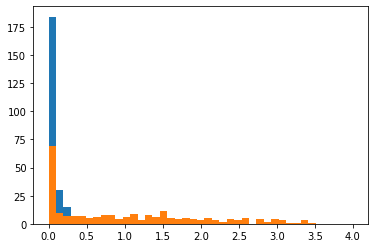

In [49]:
ax = plt.subplot(111)

thr_dff = r_th_gsort[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]-r_th_manual[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]

ax.hist(np.abs(thr_dff), bins = 41, range=(0,4))


thr_dff = r_th_autosort[(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]-r_th_manual_autosort[(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]

ax.hist(np.abs(thr_dff), bins = 41, range=(0,4))


# ax.set_ylim([0,5])
# ax.set_xlim([0,5])

[]
[0.01536621 0.07335049 0.2557047  1.04646139 0.19669076 0.03043351
 1.57325609 0.70213726 0.46220713 0.63214009 1.90160655 1.34468365
 3.33925107 2.12273152 2.02646043 0.36272681 2.38733139 1.11793332
 0.70003348 0.05602743 1.75657172 0.2045751  2.07628511 0.26970271
 0.0343853  0.0469601  0.02889625 1.41872812 0.44843739 2.17336237
 1.18695342 0.88940856 2.91898587 0.02935624 1.93231027 2.37846674
 0.02136034 0.00891533 2.51515586 0.04333462]
[1.11884933e+00 3.36714273e-01 7.84296687e-01 0.00000000e+00
 1.03349390e+00 7.83149645e-01 3.30958108e-08 2.55720760e+00
 1.26032334e+00 6.95732650e-02 4.40851851e-01 7.78901422e-01
 1.28810478e+00 1.08660690e+00 1.44519824e+00 8.55141900e-02
 1.84017886e+00 1.47360223e-01 1.86684378e+00 2.95515146e+00
 2.45965135e+00 5.31046136e-02 1.70392319e+00 1.44077996e+00
 7.58937521e-01 2.05169663e+00 9.59692423e-01 8.01993174e-01
 6.05786476e-01 1.49273333e+00 1.16868675e-02 4.71381722e-02
 1.50290863e+00 3.11172677e+00 4.34571533e-01 1.63539802e+00


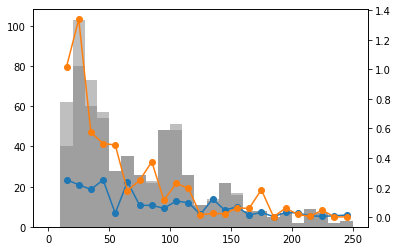

In [50]:
ax = plt.subplot(111)
window = 10
max_window = 250

cen_diff = np.abs(r_th_gsort[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]-r_th_manual[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)])
per_diff = np.abs(p_th_gsort[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]-p_th_manual[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)])
cat_diff = np.concatenate((cen_diff, per_diff))
# cat_diff[cat_diff>=1]=1


cen_diff_auto = np.abs(r_th_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]-r_th_manual_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)])
per_diff_auto = np.abs(p_th_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]-p_th_manual_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)])
cat_diff_auto = np.concatenate((cen_diff_auto, per_diff_auto))
# cat_diff_auto[cat_diff_auto>=1]=1


raphe_eis = r_th_ei[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
peripheral_eis = p_th_ei[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
cat_eis = np.concatenate((raphe_eis, peripheral_eis))

raphe_eis = r_th_ei_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
peripheral_eis = p_th_ei_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
cat_eis_auto = np.concatenate((raphe_eis, peripheral_eis))


in_range_avg = []
for i in range(int(max_window//window)):
    
    in_range = cat_diff[(cat_eis >= i*window)*(cat_eis < (i+1)*window)]
    if len(in_range)==0:
        in_range_avg += [float('nan')]
    else:
        in_range_avg += [np.mean(in_range)]
        
in_range_avg_auto = []
for i in range(int(max_window//window)):
    
    in_range = cat_diff_auto[(cat_eis_auto >= i*window)*(cat_eis_auto < (i+1)*window)]
    print(in_range)
    if len(in_range)==0:
        in_range_avg_auto += [float('nan')]
    else:
        in_range_avg_auto += [np.nanmean(in_range)]
        

ax.hist(cat_eis ,alpha=0.5, range=(0,max_window), bins=int(max_window//window) , color = "gray")
ax.hist(cat_eis_auto ,alpha=0.5, range=(0,max_window), bins=int(max_window//window) , color = "gray")



ax2=ax.twinx()
# ax2.set_ylim([0,1])
ax2.plot([window/2 + i*window for i in range(int(max_window//window))], in_range_avg, '-o')
ax2.plot([window/2 + i*window for i in range(int(max_window//window))], in_range_avg_auto, '-o')



[]
[ 1.11884933  0.33671427  0.01536621  1.0334939   2.5572076   1.26032334
  0.06957327  0.44085185  0.77890142  1.28810478  1.0866069   0.08551419
  1.84017886  0.14736022  0.2557047   1.04646139  1.57325609  0.70213726
  0.46220713  1.34468365  3.33925107  2.12273152  2.02646043  0.36272681
  1.11793332  1.50290863  0.70003348  1.75657172  2.35045503  0.1316191
  2.59041478  3.2081592   2.07628511  0.26970271  1.41872812  0.17426762
  1.18695342  1.72157589  0.88940856  2.91898587  2.59348929  1.93231027
  0.02136034 14.61968309  1.46546472  2.51515586  0.04333462  0.82290312
  1.06346148]
[8.99154176e-01 2.41597066e-03 9.01949880e-02 6.96644908e-02
 1.51498331e-01 8.64852967e-02 3.95503013e-08 1.79713493e-02
 2.15396286e-06 1.43368833e+00 2.38407005e-02 3.48941161e-02
 7.58078179e-02 6.07508875e-01 2.99727273e-01 1.59448845e-04
 1.92040408e-02 9.24415983e-01 1.32716878e+00 7.84296687e-01
 0.00000000e+00 2.23391458e-05 7.83149645e-01 3.30958108e-08
 2.65829453e-01 1.26441745e-02 7.1

(0.0, 55.0)

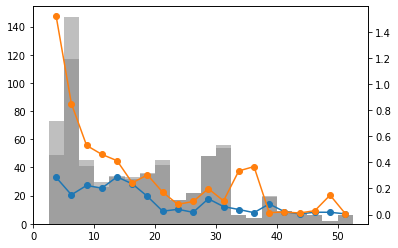

In [132]:
ax = plt.subplot(111)
ax2=ax.twinx()

window = 2.5

cen_diff = np.abs(r_th_gsort[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]-r_th_manual[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)])
per_diff = np.abs(p_th_gsort[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]-p_th_manual[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)])
cat_diff = np.concatenate((cen_diff, per_diff))
# cat_diff[cat_diff>=1]=1


cen_diff_auto = np.abs(r_th_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]-r_th_manual_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)])
per_diff_auto = np.abs(p_th_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]-p_th_manual_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)])
cat_diff_auto = np.concatenate((cen_diff_auto, per_diff_auto))
# cat_diff_auto[cat_diff_auto>=1]=1


raphe_eis = r_th_ei_snr[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
peripheral_eis = p_th_ei_snr[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
cat_eis = np.concatenate((raphe_eis, peripheral_eis))

raphe_eis = r_th_ei_snr_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
peripheral_eis = p_th_ei_snr_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
cat_eis_auto = np.concatenate((raphe_eis, peripheral_eis))


in_range_avg = []
for i in range(int(60//window)):
    
    in_range = cat_diff[(cat_eis >= i*window)*(cat_eis < (i+1)*window)]
    if len(in_range)==0:
        in_range_avg += [float('nan')]
    else:
        in_range_avg += [np.mean(in_range)]
        
in_range_avg_auto = []
for i in range(int(60//window)):
    
    in_range = cat_diff_auto[(cat_eis_auto >= i*window)*(cat_eis_auto < (i+1)*window)]
    print(in_range)
    if len(in_range)==0:
        in_range_avg_auto += [float('nan')]
    else:
        in_range_avg_auto += [np.nanmean(in_range)]
        

ax.hist(cat_eis ,alpha=0.5, range=(0,60), bins=int(60//window) , color = "gray")
ax.hist(cat_eis_auto ,alpha=0.5, range=(0,60), bins=int(60//window) , color = "gray")

# ax2.set_ylim([0,1])
ax2.plot([window/2 + i*window for i in range(int(60//window))], in_range_avg, '-o')
ax2.plot([window/2 + i*window for i in range(int(60//window))], in_range_avg_auto, '-o')
ax.set_xlim([0,55])


[]
[ 1.11884933  0.33671427  0.01536621  1.0334939   2.5572076   1.26032334
  0.06957327  0.44085185  0.77890142  1.28810478  1.0866069   0.08551419
  1.84017886  0.14736022  0.2557047   1.04646139  1.57325609  0.70213726
  0.46220713  1.34468365  3.33925107  2.12273152  2.02646043  0.36272681
  1.11793332  1.50290863  0.70003348  1.75657172  2.35045503  0.1316191
  2.59041478  3.2081592   2.07628511  0.26970271  1.41872812  0.17426762
  1.18695342  1.72157589  0.88940856  2.91898587  2.59348929  1.93231027
  0.02136034 14.61968309  1.46546472  2.51515586  0.04333462  0.82290312
  1.06346148]
[8.99154176e-01 2.41597066e-03 9.01949880e-02 6.96644908e-02
 1.51498331e-01 8.64852967e-02 3.95503013e-08 1.79713493e-02
 2.15396286e-06 1.43368833e+00 2.38407005e-02 3.48941161e-02
 7.58078179e-02 6.07508875e-01 2.99727273e-01 1.59448845e-04
 1.92040408e-02 9.24415983e-01 1.32716878e+00 7.84296687e-01
 0.00000000e+00 2.23391458e-05 7.83149645e-01 3.30958108e-08
 2.65829453e-01 1.26441745e-02 7.1

(0.0, 55.0)

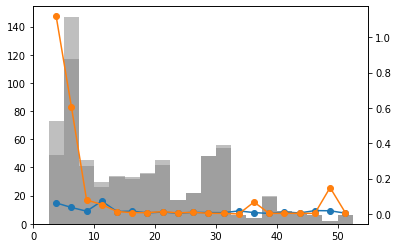

In [133]:
ax = plt.subplot(111)
ax2=ax.twinx()

window = 2.5

cen_diff = np.abs(r_th_gsort[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]-r_th_manual[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)])
per_diff = np.abs(p_th_gsort[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]-p_th_manual[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)])
cat_diff = np.concatenate((cen_diff, per_diff))
# cat_diff[cat_diff>=1]=1


cen_diff_auto = np.abs(r_th_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]-r_th_manual_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)])
per_diff_auto = np.abs(p_th_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]-p_th_manual_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)])
cat_diff_auto = np.concatenate((cen_diff_auto, per_diff_auto))
# cat_diff_auto[cat_diff_auto>=1]=1


raphe_eis = r_th_ei_snr[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
peripheral_eis = p_th_ei_snr[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
cat_eis = np.concatenate((raphe_eis, peripheral_eis))

raphe_eis = r_th_ei_snr_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
peripheral_eis = p_th_ei_snr_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
cat_eis_auto = np.concatenate((raphe_eis, peripheral_eis))


in_range_avg = []
for i in range(int(60//window)):
    
    in_range = cat_diff[(cat_eis >= i*window)*(cat_eis < (i+1)*window)]
    if len(in_range)==0:
        in_range_avg += [float('nan')]
    else:
        in_range_avg += [np.median(in_range)]
        
in_range_avg_auto = []
for i in range(int(60//window)):
    
    in_range = cat_diff_auto[(cat_eis_auto >= i*window)*(cat_eis_auto < (i+1)*window)]
    print(in_range)
    if len(in_range)==0:
        in_range_avg_auto += [float('nan')]
    else:
        in_range_avg_auto += [np.nanmedian(in_range)]
        

ax.hist(cat_eis ,alpha=0.5, range=(0,60), bins=int(60//window) , color = "gray")
ax.hist(cat_eis_auto ,alpha=0.5, range=(0,60), bins=int(60//window) , color = "gray")

# ax2.set_ylim([0,1])
ax2.plot([window/2 + i*window for i in range(int(60//window))], in_range_avg, '-o')
ax2.plot([window/2 + i*window for i in range(int(60//window))], in_range_avg_auto, '-o')
ax.set_xlim([0,55])


(0.0, 1.0)

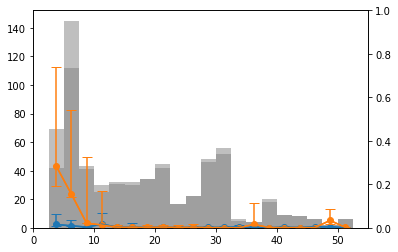

In [134]:
ax = plt.subplot(111)
ax2=ax.twinx()

window = 2.5

cen_diff = np.abs(r_th_gsort[(r_th_gsort>0)&(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual> 0)]-r_th_manual[(r_th_gsort>0 )&(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual> 0)])/rdf['max_amplitude'][0]
per_diff = np.abs(p_th_gsort[(p_th_gsort>0)&(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual> 0)]-p_th_manual[(p_th_gsort>0)&(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual> 0)])/pdf['max_amplitude'][0]
cat_diff = np.concatenate((cen_diff, per_diff))
# cat_diff[cat_diff>=1]=1


cen_diff_auto = np.abs(r_th_autosort[(r_th_autosort>0)&(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort> 0)]-r_th_manual_autosort[(r_th_autosort>0)&(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort> 0)])/rdf['max_amplitude'][0]
per_diff_auto = np.abs(p_th_autosort[(p_th_autosort>0)&(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort> 0)]-p_th_manual_autosort[(p_th_autosort>0)&(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort> 0)])/pdf['max_amplitude'][0]
cat_diff_auto = np.concatenate((cen_diff_auto, per_diff_auto))
# cat_diff_auto[cat_diff_auto>=1]=1


raphe_eis = r_th_ei_snr[(r_th_gsort>0)&(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual> 0)]
peripheral_eis = p_th_ei_snr[(p_th_gsort>0 )&(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual> 0)]
cat_eis = np.concatenate((raphe_eis, peripheral_eis))

raphe_eis = r_th_ei_snr_autosort[(r_th_autosort>0)&(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort>0)]
peripheral_eis = p_th_ei_snr_autosort[(p_th_autosort>0)&(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort> 0)]
cat_eis_auto = np.concatenate((raphe_eis, peripheral_eis))


in_range_avg = []
in_range_q = []
for i in range(int(60//window)):
    
    in_range = np.array(cat_diff[(cat_eis >= i*window)*(cat_eis < (i+1)*window)])
    
    if len(in_range)==0:
        in_range_avg += [float('nan')]
        in_range_q += [[0, 0]]
    else:
        up_q = np.quantile(in_range, 0.75)
        low_q = np.quantile(in_range, 0.25)
        np.r_[in_range[in_range>=up_q], in_range[in_range<=low_q]]
        in_range_avg += [np.median(in_range)]
        in_range_q += [[low_q, up_q]]
        
in_range_avg_auto = []
in_range_q_auto = []
for i in range(int(60//window)):
    
    in_range = np.array(cat_diff_auto[(cat_eis_auto >= i*window)*(cat_eis_auto < (i+1)*window)])
    
    if len(in_range)==0:
        in_range_avg_auto += [float('nan')]
        in_range_q_auto += [[0,0]]
    else:
        up_q = np.quantile(in_range, 0.75)
        low_q = np.quantile(in_range, 0.25)
        in_range_avg_auto += [np.nanmedian(in_range)]
        in_range_q_auto += [[low_q, up_q]]
        

ax.hist(cat_eis ,alpha=0.5, range=(0,60), bins=int(60//window) , color = "gray")
ax.hist(cat_eis_auto ,alpha=0.5, range=(0,60), bins=int(60//window) , color = "gray")

# ax2.set_ylim([0,1])
ax2.plot([window/2 + i*window for i in range(int(60//window))], in_range_avg, '-o', color = "C0")
ax2.errorbar([window/2 + i*window for i in range(int(60//window))], in_range_avg, np.array(in_range_q).T, color = "C0", capsize = 5)

ax2.plot([window/2 + i*window for i in range(int(60//window))], in_range_avg_auto, '-o', color = "C1")
ax2.errorbar([window/2 + i*window for i in range(int(60//window))], in_range_avg_auto, np.array(in_range_q_auto).T, color = "C1", capsize = 5)

ax.set_xlim([0,55])
ax2.set_ylim([0, 1])


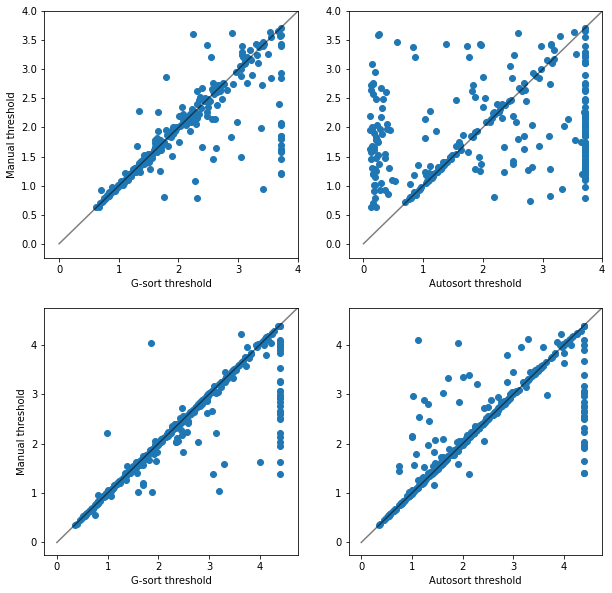

In [135]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

window = 2.5
r_max_amp = rdf['max_amplitude'][0]
p_max_amp = pdf['max_amplitude'][0]

r_g = r_th_gsort[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
r_g[r_g<=0]=r_max_amp
r_g[r_g>=r_max_amp]=r_max_amp
r_m = r_th_manual[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
r_m[r_m<=0]=0

p_g = p_th_gsort[(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
p_g[p_g<=0]=p_max_amp
p_g[p_g>=p_max_amp]=p_max_amp
p_m = p_th_manual[(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
p_m[p_m<=0]=0
cat_diff = np.concatenate((cen_diff, per_diff))
# cat_diff[cat_diff>=1]=1


r_a = r_th_autosort[(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_a[r_a<=0]=r_max_amp
r_a[r_a>=r_max_amp]=r_max_amp
r_ma = r_th_manual_autosort[(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_ma[r_ma<=0]=0
p_a = p_th_autosort[(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_a[p_a<=0]=p_max_amp
p_a[p_a>=p_max_amp]=p_max_amp
p_ma = p_th_manual_autosort[(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_ma[p_ma<=0]=0

raphe_eis = r_th_ei_snr[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
peripheral_eis = p_th_ei_snr[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
cat_eis = np.concatenate((raphe_eis, peripheral_eis))

# raphe_eis = r_th_ei_snr_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
# peripheral_eis = p_th_ei_snr_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
# cat_eis_auto = np.concatenate((raphe_eis, peripheral_eis))



        

ax[0, 0].scatter(np.r_[r_g], np.r_[r_m])
ax[0, 1].scatter(np.r_[r_a], np.r_[r_ma])
ax[1, 0].scatter(np.r_[p_g], np.r_[p_m])
ax[1, 1].scatter(np.r_[p_a], np.r_[p_ma])


ax[0, 0].set_ylabel("Manual threshold")
ax[1, 0].set_ylabel("Manual threshold")

ax[0, 0].set_xlabel("G-sort threshold")
ax[0, 1].set_xlabel("Autosort threshold")
ax[1, 0].set_xlabel("G-sort threshold")
ax[1, 1].set_xlabel("Autosort threshold")


ax[0, 0].set_ylim([-0.25,4])
ax[0, 0].set_xlim([-0.25,4])

ax[0, 1].set_ylim([-0.25,4])
ax[0, 1].set_xlim([-0.25,4])

ax[1, 0].set_ylim([-0.25,4.75])
ax[1, 0].set_xlim([-0.25,4.75])

ax[1, 1].set_ylim([-0.25,4.75])
ax[1, 1].set_xlim([-0.25,4.75])
ax[0, 0].plot([0, 5], [0, 5], color = "black", alpha = 0.5)
ax[0, 1].plot([0, 5], [0, 5], color = "black", alpha = 0.5)

ax[1, 0].plot([0, 5], [0, 5], color = "black", alpha = 0.5)
ax[1, 1].plot([0, 5], [0, 5], color = "black", alpha = 0.5)


(-0.25, 4.75)

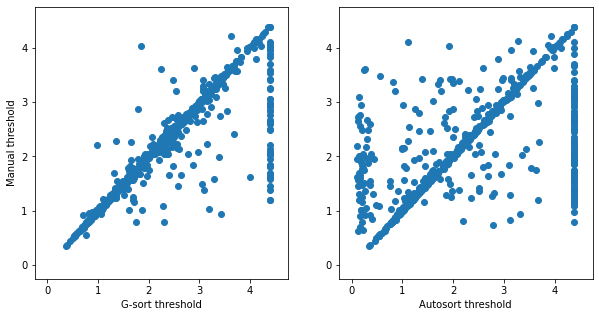

In [136]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

window = 2.5
r_max_amp = rdf['max_amplitude'][0]
p_max_amp = pdf['max_amplitude'][0]

r_g = r_th_gsort[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
r_g[r_g<=0]=r_max_amp
r_g[r_g>=r_max_amp]=p_max_amp
r_m = r_th_manual[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
r_m[r_m<=0]=0

p_g = p_th_gsort[(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
p_g[p_g<=0]=p_max_amp
p_g[p_g>=p_max_amp]=p_max_amp
p_m = p_th_manual[(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
p_m[p_m<=0]=0
cat_diff = np.concatenate((cen_diff, per_diff))
# cat_diff[cat_diff>=1]=1


r_a = r_th_autosort[(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_a[r_a<=0]=r_max_amp
r_a[r_a>=r_max_amp]=p_max_amp
r_ma = r_th_manual_autosort[(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_ma[r_ma<=0]=0
p_a = p_th_autosort[(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_a[p_a<=0]=p_max_amp
p_a[p_a>=p_max_amp]=p_max_amp
p_ma = p_th_manual_autosort[(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_ma[p_ma<=0]=0

raphe_eis = r_th_ei_snr[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
peripheral_eis = p_th_ei_snr[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
cat_eis = np.concatenate((raphe_eis, peripheral_eis))

# raphe_eis = r_th_ei_snr_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
# peripheral_eis = p_th_ei_snr_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
# cat_eis_auto = np.concatenate((raphe_eis, peripheral_eis))



        

ax[0].scatter(np.r_[p_g, r_g], np.r_[p_m, r_m])
ax[1].scatter(np.r_[p_a, r_a], np.r_[p_ma, r_ma])


ax[0].set_ylabel("Manual threshold")
# ax[1, 0].set_ylabel("Manual threshold")

ax[0].set_xlabel("G-sort threshold")
ax[1].set_xlabel("Autosort threshold")
# ax[1, 0].set_xlabel("G-sort threshold")
# ax[1, 1].set_xlabel("Autosort threshold")


# ax[0, 0].set_ylim([-0.25,4])
# ax[0, 0].set_xlim([-0.25,4])

# ax[0, 1].set_ylim([-0.25,4])
# ax[0, 1].set_xlim([-0.25,4])

ax[0].set_ylim([-0.25,4.75])
ax[0].set_xlim([-0.25,4.75])

ax[1].set_ylim([-0.25,4.75])
ax[1].set_xlim([-0.25,4.75])


# ax[1, 1].set_ylim([-0.25,4.75])
# ax[1, 1].set_xlim([-0.25,4.75])
# ax[0, 0].plot([0, 5], [0, 5], color = "black", alpha = 0.5)
# ax[0, 1].plot([0, 5], [0, 5], color = "black", alpha = 0.5)

# ax[1, 0].plot([0, 5], [0, 5], color = "black", alpha = 0.5)
# ax[1, 1].plot([0, 5], [0, 5], color = "black", alpha = 0.5)


(-0.25, 4.75)

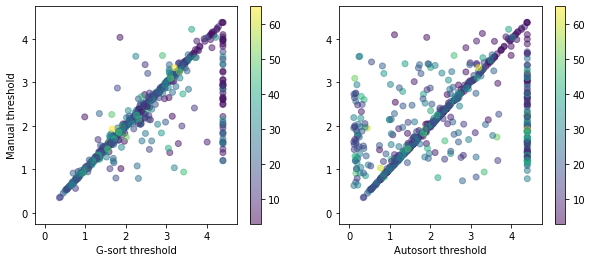

In [137]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

window = 2.5
r_max_amp = rdf['max_amplitude'][0]
p_max_amp = pdf['max_amplitude'][0]

r_g = r_th_gsort[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
r_g[r_g<=0]=r_max_amp
r_g[r_g>=r_max_amp]=p_max_amp
r_m = r_th_manual[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
r_m[r_m<=0]=0

p_g = p_th_gsort[(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
p_g[p_g<=0]=p_max_amp
p_g[p_g>=p_max_amp]=p_max_amp
p_m = p_th_manual[(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
p_m[p_m<=0]=0
cat_diff = np.concatenate((cen_diff, per_diff))
# cat_diff[cat_diff>=1]=1


r_a = r_th_autosort[(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_a[r_a<=0]=r_max_amp
r_a[r_a>=r_max_amp]=p_max_amp
r_ma = r_th_manual_autosort[(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_ma[r_ma<=0]=0
p_a = p_th_autosort[(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_a[p_a<=0]=p_max_amp
p_a[p_a>=p_max_amp]=p_max_amp
p_ma = p_th_manual_autosort[(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_ma[p_ma<=0]=0

raphe_eis = r_th_ei_snr[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
peripheral_eis = p_th_ei_snr[(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
cat_eis = np.concatenate((raphe_eis, peripheral_eis))

# raphe_eis = r_th_ei_snr_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
# peripheral_eis = p_th_ei_snr_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
# cat_eis_auto = np.concatenate((raphe_eis, peripheral_eis))



cm = plt.cm.get_cmap('viridis')

ax[0].scatter(np.r_[p_g, r_g], np.r_[p_m, r_m], c=cat_eis, cmap=cm, alpha = 0.5)
sc = ax[1].scatter(np.r_[p_a, r_a], np.r_[p_ma, r_ma], c=cat_eis, cmap=cm, alpha = 0.5)


fig.colorbar(sc, ax = ax[0])
fig.colorbar(sc, ax = ax[1])

# plt.show()

# ax[0].scatter(np.r_[p_g, r_g], np.r_[p_m, r_m])
# ax[1].scatter(np.r_[p_a, r_a], np.r_[p_ma, r_ma])


ax[0].set_ylabel("Manual threshold")
# ax[1, 0].set_ylabel("Manual threshold")

ax[0].set_xlabel("G-sort threshold")
ax[1].set_xlabel("Autosort threshold")
# ax[1, 0].set_xlabel("G-sort threshold")
# ax[1, 1].set_xlabel("Autosort threshold")


# ax[0, 0].set_ylim([-0.25,4])
# ax[0, 0].set_xlim([-0.25,4])

# ax[0, 1].set_ylim([-0.25,4])
# ax[0, 1].set_xlim([-0.25,4])

ax[0].set_ylim([-0.25,4.75])
ax[0].set_xlim([-0.25,4.75])

ax[1].set_ylim([-0.25,4.75])
ax[1].set_xlim([-0.25,4.75])




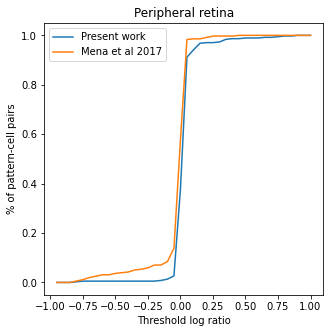

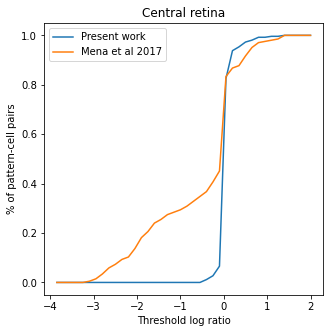

In [202]:
fig, ax1 = plt.subplots(1, 1, figsize = (5,5))
fig, ax2 = plt.subplots(1, 1, figsize = (5,5))

window = 2.5
r_max_amp = rdf['max_amplitude'][0]
p_max_amp = pdf['max_amplitude'][0]

r_g = r_th_gsort[(r_th_gsort>0)&(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
# r_g[r_g<=0]=r_max_amp
# r_g[r_g>=r_max_amp]=p_max_amp
r_m = r_th_manual[(r_th_gsort>0)&(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
# r_m[r_m<=0]=0

p_g = p_th_gsort[(p_th_gsort>0)&(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
# p_g[p_g<=0]=p_max_amp
# p_g[p_g>=p_max_amp]=p_max_amp
p_m = p_th_manual[(p_th_gsort>0)&(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
# p_m[p_m<=0]=0
cat_diff = np.concatenate((cen_diff, per_diff))
# cat_diff[cat_diff>=1]=1


r_a = r_th_autosort[(r_th_autosort>0)&(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_a[r_a<=0]=r_max_amp
r_a[r_a>=r_max_amp]=p_max_amp
r_ma = r_th_manual_autosort[(r_th_autosort>0)&(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_ma[r_ma<=0]=0
p_a = p_th_autosort[(p_th_autosort>0)&(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_a[p_a<=0]=p_max_amp
p_a[p_a>=p_max_amp]=p_max_amp
p_ma = p_th_manual_autosort[(p_th_autosort>0)&(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_ma[p_ma<=0]=0


x, b = np.histogram(np.log(r_g/r_m), bins = 40, range = (-4, 2))

ax2.plot(b[1:], np.cumsum(x)/np.sum(x), label = "Present work")

x, b = np.histogram(np.log(r_a/r_ma), bins = 40, range = (-4, 2))

ax2.plot(b[1:], np.cumsum(x)/np.sum(x), label = "Mena et al 2017")
ax2.set_title("Central retina")

x, b = np.histogram(np.log(p_g/p_m), bins = 40, range = (-1, 1))

ax1.plot(b[1:],np.cumsum(x)/np.sum(x), label = "Present work")

x, b = np.histogram(np.log(p_a/p_ma), bins = 40, range = (-1, 1))

ax1.plot(b[1:],np.cumsum(x)/np.sum(x), label = "Mena et al 2017")
ax2.legend()
ax1.set_title("Peripheral retina")
# fig.suptitle("Cumulative density of threshold log ratio ")
ax1.set_xlabel("Threshold log ratio")
ax2.set_xlabel("Threshold log ratio")
ax1.set_ylabel("% of pattern-cell pairs")
ax2.set_ylabel("% of pattern-cell pairs")
ax1.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Threshold log ratio')

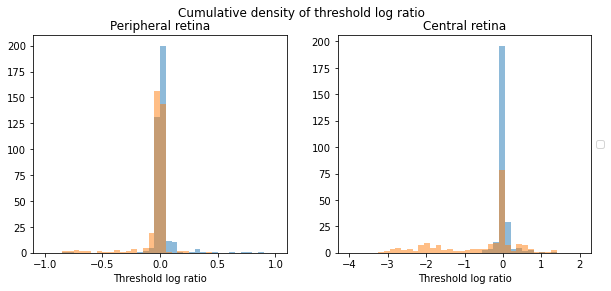

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

window = 2.5
r_max_amp = rdf['max_amplitude'][0]
p_max_amp = pdf['max_amplitude'][0]

r_g = r_th_gsort[(r_th_gsort>0)&(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
# r_g[r_g<=0]=r_max_amp
# r_g[r_g>=r_max_amp]=p_max_amp
r_m = r_th_manual[(r_th_gsort>0)&(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
# r_m[r_m<=0]=0

p_g = p_th_gsort[(p_th_gsort>0)&(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
# p_g[p_g<=0]=p_max_amp
# p_g[p_g>=p_max_amp]=p_max_amp
p_m = p_th_manual[(p_th_gsort>0)&(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
# p_m[p_m<=0]=0
cat_diff = np.concatenate((cen_diff, per_diff))
# cat_diff[cat_diff>=1]=1


r_a = r_th_autosort[(r_th_autosort>0)&(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_a[r_a<=0]=r_max_amp
r_a[r_a>=r_max_amp]=p_max_amp
r_ma = r_th_manual_autosort[(r_th_autosort>0)&(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_ma[r_ma<=0]=0
p_a = p_th_autosort[(p_th_autosort>0)&(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_a[p_a<=0]=p_max_amp
p_a[p_a>=p_max_amp]=p_max_amp
p_ma = p_th_manual_autosort[(p_th_autosort>0)&(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_ma[p_ma<=0]=0


ax[1].hist(np.log(r_g/r_m), bins = 40, range = (-4, 2), alpha=0.5)


ax[1].hist(np.log(r_a/r_ma), bins = 40, range = (-4, 2), alpha=0.5)

ax[1].set_title("Central retina")

ax[0].hist(np.log(p_g/p_m), bins = 40, range = (-1, 1), alpha=0.5)


ax[0].hist(np.log(p_a/p_ma), bins = 40, range = (-1, 1), alpha=0.5)

ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].set_title("Peripheral retina")
fig.suptitle("Cumulative density of threshold log ratio ")
ax[0].set_xlabel("Threshold log ratio")
ax[1].set_xlabel("Threshold log ratio")

(0.0, 1.0)

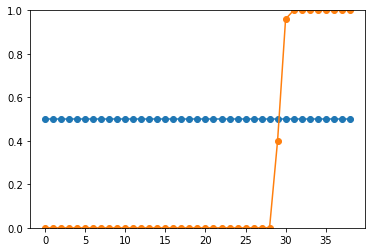

In [825]:
ax = plt.subplot(111)
i = 43
ax.plot(gpa.fsigmoid(amplitides, r_g_s[i], r_g_t[i]), '-o')
ax.plot(gpa.fsigmoid(amplitides, r_m_s[i], r_m_t[i]), '-o')
ax.set_ylim([0,1])

In [896]:
# fig, ax = plt.subplots(1, 2, figsize = (10, 4))

window = 2.5
r_max_amp = rdf['max_amplitude'][0]
p_max_amp = pdf['max_amplitude'][0]

r_g_t = np.array(r_th_gsort)
r_g_s = np.array(4*r_sl_gsort)

# r_g[r_g<=0]=r_max_amp
# r_g[r_g>=r_max_amp]=p_max_amp
r_m_t = np.array(r_th_manual)
r_m_s = np.array(4*r_sl_manual)

r_sig_diff = []
r_tot_sig_diff = []
for i in range(len(r_g_t)):
    print(i, r_g_t[i])
    if r_m_t[i] != 0:
        r_m_sigmoid = gpa.fsigmoid(amplitides, r_m_s[i], r_m_t[i])
    else:
        
        r_m_sigmoid = np.zeros_like(amplitides)
    
    if r_g_t[i] != 0:
        r_g_sigmoid = gpa.fsigmoid(amplitides, r_g_s[i], r_g_t[i])
    else:
        r_g_sigmoid = np.zeros_like(amplitides)
    r_sig_diff += list(r_m_sigmoid-r_g_sigmoid)
    r_tot_sig_diff += [list(r_m_sigmoid-r_g_sigmoid)]
        


# r_m[r_m<=0]=0

p_g_t = np.array(p_th_gsort)
p_g_s = np.array(4*p_sl_gsort)

p_m_t = np.array(p_th_manual)
p_m_s = np.array(4*p_sl_manual)


p_sig_diff = []
p_tot_sig_diff = []
for i in range(len(p_g_t)):
    if p_m_t[i] != 0:
        p_m_sigmoid = gpa.fsigmoid(amplitides, p_m_s[i], p_m_t[i])
    else:
        p_m_sigmoid = np.zeros_like(amplitides)
    
    if p_g_t[i] != 0:
        p_g_sigmoid = gpa.fsigmoid(amplitides, p_g_s[i], p_g_t[i])
    else:
        p_g_sigmoid = np.zeros_like(amplitides)
    p_sig_diff += list(p_m_sigmoid-p_g_sigmoid)
    p_tot_sig_diff += [list(p_m_sigmoid-p_g_sigmoid)]
        

r_a_t = np.array(r_th_autosort)
r_a_s = np.array(4*r_sl_autosort)

r_ma_t = np.array(r_th_manual_autosort)
r_ma_s = np.array(4*r_sl_manual_autosort)

r_sig_diff_a = []
r_tot_sig_diff_a = []
for i in range(len(r_a_t)):
    if r_ma_t[i] != 0:
        r_ma_sigmoid = gpa.fsigmoid(amplitides, r_ma_s[i], r_ma_t[i])
    else:
        
        r_ma_sigmoid = np.zeros_like(amplitides)
    
    if r_a_t[i] != 0:
        r_a_sigmoid = gpa.fsigmoid(amplitides, r_a_s[i], r_a_t[i])
    else:
        r_a_sigmoid = np.zeros_like(amplitides)
    r_sig_diff_a += list(r_ma_sigmoid-r_a_sigmoid)
    r_tot_sig_diff_a += [list(r_ma_sigmoid-r_a_sigmoid)]

p_a_t = np.array(p_th_autosort)
p_a_s = np.array(4*p_sl_autosort)

p_ma_t = np.array(p_th_manual_autosort)
p_ma_s = np.array(4*p_sl_manual_autosort)


p_sig_diff_a = []
p_tot_sig_diff_a = []
for i in range(len(p_a_t)):
    if p_ma_t[i] != 0:
        p_ma_sigmoid = gpa.fsigmoid(amplitides, p_ma_s[i], p_ma_t[i])
    else:
        p_ma_sigmoid = np.zeros_like(amplitides)
    
    if p_a_t[i] != 0:
        p_a_sigmoid = gpa.fsigmoid(amplitides, p_a_s[i], p_a_t[i])
    else:
        p_a_sigmoid = np.zeros_like(amplitides)
    p_sig_diff_a += list(p_ma_sigmoid-p_a_sigmoid)
    p_tot_sig_diff_a += [list(p_ma_sigmoid-p_a_sigmoid)]

raphe_eis = r_th_ei_snr
peripheral_eis = p_th_ei_snr
cat_eis = np.concatenate((raphe_eis, peripheral_eis))

raphe_eis_a = r_th_ei_snr_autosort
peripheral_eis_a = p_th_ei_snr_autosort
cat_eis_auto = np.concatenate((raphe_eis_a, peripheral_eis_a))



0 1.520692783786862
1 2.7297172482001657
2 2.578622165098632
3 11.610892942063597
4 2.62318683199372
5 1.7062236139212166
6 1.8740157480314965
7 3.2157030736173486
8 1.166066979911588
9 2.270570333188534
10 3.190324062180038
11 0.0
12 2.8658415129453587
13 1.0446654528453874
14 1.2486753645456323
15 1.7510849725293849
16 2.180237704302338
17 3.121631296422037
18 0.824280701374974
19 3.153085990092077
20 1.3711665975963532
21 2.688214148608168
22 2.315738865695249
23 5.881495447028558
24 1.8718795787118616
25 1.195567208153451
26 1.369251263371201
27 2.637601740486428
28 0.7646746465194668
29 1.2212002767427088
30 3.507906404514185
31 1.2932002670370104
32 3.671783216789505
33 2.3083225384449
34 24.05209752795084
35 0.0
36 2.1005451241671715
37 2.476377952755906
38 2.032972440944882
39 1.1043647965029366
40 1.551749126745972
41 1.346470797686471
42 2.0479610932268284
43 0.0
44 1.2848417290551235
45 3.052659176626012
46 1.3257742755923925
47 3.438036126775693
48 1.3630984916738498
49 0.9

Text(0.5, 0, 'Max probability deviation')

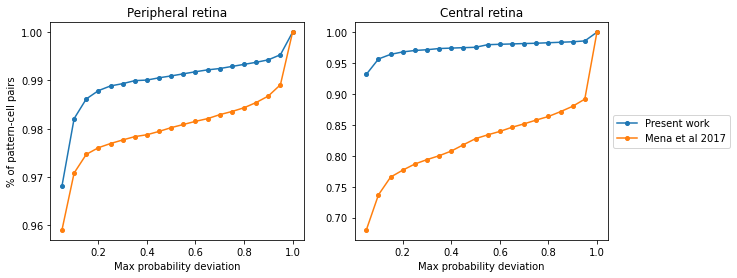

In [915]:
fig, ax = plt.subplots(1,2, figsize = (10, 4))
x, b = np.histogram(np.abs(r_sig_diff), bins = 20, range=(0,1))
x = np.r_[x]
ax[1].plot(b[1:], np.cumsum(x)/np.sum(x), '-o', markersize = 4, label = "Present work")

x, b = np.histogram(np.abs(r_sig_diff_a), bins = 20, range=(0,1))
x = np.r_[x]
ax[1].plot(b[1:], np.cumsum(x)/np.sum(x), '-o', markersize = 4, label = "Mena et al 2017")
# ax[0].set_ylim([0, 1.01])
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))



x, b = np.histogram(np.abs(p_sig_diff), bins = 20, range=(0,1))
x = np.r_[x]
ax[0].plot(b[1:], np.cumsum(x)/np.sum(x), '-o', markersize = 4)

x, b = np.histogram(np.abs(p_sig_diff_a), bins = 20, range=(0,1))
x = np.r_[x]
ax[0].plot(b[1:], np.cumsum(x)/np.sum(x), '-o', markersize = 4)
# ax[1].set_ylim([0, 1.01])
ax[1].set_title("Central retina")
ax[0].set_title("Peripheral retina")
ax[0].set_ylabel("% of pattern-cell pairs")
ax[0].set_xlabel("Max probability deviation")
ax[1].set_xlabel("Max probability deviation")




/Volumes/Lab/Development/miniconda-peggyo/envs/jeffbrown39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Volumes/Lab/Development/miniconda-peggyo/envs/jeffbrown39/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


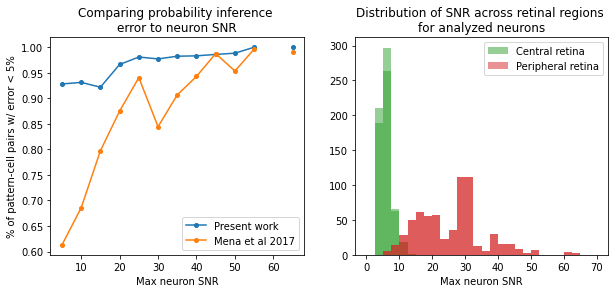

In [924]:
fig, ax = plt.subplots(1,2, figsize = (10, 4))

percentile_5 =[]
for i in range(70//5):
    r_set = np.r_[r_tot_sig_diff,p_tot_sig_diff][(i*5<=cat_eis) * (cat_eis<5*(i+1))]
    r_set = np.array([r for r_ in r_set for r in r_])
    percentile_5 += [np.mean(np.abs(r_set)<=0.05)]

percentile_5_a =[]
for i in range(70//5):
    r_set = np.r_[r_tot_sig_diff_a,p_tot_sig_diff_a][(i*5<=cat_eis_auto) * (cat_eis_auto<5*(i+1))]
    r_set = np.array([r for r_ in r_set for r in r_])
    percentile_5_a += [np.mean(np.abs(r_set)<=0.05)]

ax[0].plot(5+5*np.arange(70//5), percentile_5, '-o', markersize = 4, label = "Present work")

ax[0].plot(5+5*np.arange(70//5), percentile_5_a, '-o', markersize = 4, label = "Mena et al 2017")
ax[0].legend()
ax[0].set_ylabel("% of pattern-cell pairs w/ error < 5%")
ax[0].set_xlabel("Max neuron SNR")
ax[0].set_title("Comparing probability inference \nerror to neuron SNR")
ax[1].set_title("Distribution of SNR across retinal regions \nfor analyzed neurons")

ax[1].hist(raphe_eis, bins = int(70//2.5), alpha = 0.5, range=(0,70), color = "C2", label="Central retina")
ax[1].hist(raphe_eis_a, bins = int(70//2.5), alpha = 0.5, range=(0,70), color = "C2")
ax[1].hist(peripheral_eis, bins = int(70//2.5), alpha = 0.5, range=(0,70), color = "C3", label="Peripheral retina")
ax[1].hist(peripheral_eis_a, bins = int(70//2.5), alpha = 0.5, range=(0,70), color = "C3")
ax[1].set_xlabel("Max neuron SNR")
ax[1].legend()

No handles with labels found to put in legend.
/Volumes/Lab/Development/miniconda-peggyo/envs/jeffbrown39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Volumes/Lab/Development/miniconda-peggyo/envs/jeffbrown39/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


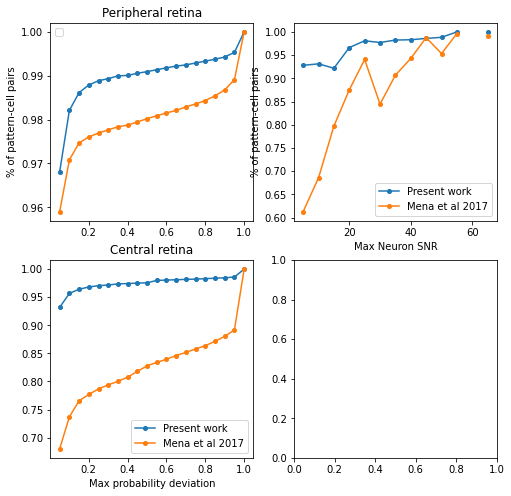

In [895]:
fig, ax = plt.subplots(2,2, figsize = (8, 8))
x, b = np.histogram(np.abs(r_sig_diff), bins = 20, range=(0,1))
x = np.r_[x]
ax[1,0].plot(b[1:], np.cumsum(x)/np.sum(x), '-o', markersize = 4, label = "Present work")

x, b = np.histogram(np.abs(r_sig_diff_a), bins = 20, range=(0,1))
x = np.r_[x]
ax[1,0].plot(b[1:], np.cumsum(x)/np.sum(x), '-o', markersize = 4, label = "Mena et al 2017")
# ax[0].set_ylim([0, 1.01])
ax[1,0].legend()



x, b = np.histogram(np.abs(p_sig_diff), bins = 20, range=(0,1))
x = np.r_[x]
ax[0,0].plot(b[1:], np.cumsum(x)/np.sum(x), '-o', markersize = 4)

x, b = np.histogram(np.abs(p_sig_diff_a), bins = 20, range=(0,1))
x = np.r_[x]
ax[0,0].plot(b[1:], np.cumsum(x)/np.sum(x), '-o', markersize = 4)
# ax[1].set_ylim([0, 1.01])
ax[1,0].set_title("Central retina")
ax[0,0].set_title("Peripheral retina")
ax[0,0].set_ylabel("% of pattern-cell pairs")
# ax[0,0].set_xlabel("Max probability deviation")
ax[1,0].set_xlabel("Max probability deviation")
ax[0,0].legend()



percentile_5 =[]
for i in range(70//5):
    r_set = np.r_[r_tot_sig_diff,p_tot_sig_diff][(i*5<=cat_eis) * (cat_eis<5*(i+1))]
    r_set = np.array([r for r_ in r_set for r in r_])
    percentile_5 += [np.mean(np.abs(r_set)<=0.05)]

percentile_5_a =[]
for i in range(70//5):
    r_set = np.r_[r_tot_sig_diff_a,p_tot_sig_diff_a][(i*5<=cat_eis_auto) * (cat_eis_auto<5*(i+1))]
    r_set = np.array([r for r_ in r_set for r in r_])
    percentile_5_a += [np.mean(np.abs(r_set)<=0.05)]

ax[0,1].plot(5+5*np.arange(70//5), percentile_5, '-o', markersize = 4, label = "Present work")

ax[0,1].plot(5+5*np.arange(70//5), percentile_5_a, '-o', markersize = 4, label = "Mena et al 2017")

ax[0,1].set_ylabel("% of pattern-cell pairs")
ax[0,1].set_xlabel("Max Neuron SNR")
ax[0,1].legend()






In [ ]:
fig, ax = plt.subplots(1,2, figsize = (8, 3))
x, b = np.histogram(np.abs(r_sig_diff), bins = 20, range=(0,1))
x = np.r_[x]
ax[1].plot(b[1:], np.cumsum(x)/np.sum(x), '-o', markersize = 4, label = "Present work")

x, b = np.histogram(np.abs(r_sig_diff_a), bins = 20, range=(0,1))
x = np.r_[x]
ax[1].plot(b[1:], np.cumsum(x)/np.sum(x), '-o', markersize = 4, label = "Mena et al 2017")
# ax[0].set_ylim([0, 1.01])
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))



x, b = np.histogram(np.abs(p_sig_diff), bins = 20, range=(0,1))
x = np.r_[x]
ax[0].plot(b[1:], np.cumsum(x)/np.sum(x), '-o', markersize = 4)

x, b = np.histogram(np.abs(p_sig_diff_a), bins = 20, range=(0,1))
x = np.r_[x]
ax[0].plot(b[1:], np.cumsum(x)/np.sum(x), '-o', markersize = 4)
# ax[1].set_ylim([0, 1.01])
ax[1].set_title("Central retina")
ax[0].set_title("Peripheral retina")
ax[0].set_ylabel("% of pattern-cell pairs")
ax[0].set_xlabel("Max probability deviation")
ax[1].set_xlabel("Max probability deviation")




Text(0.5, 1.0, 'peripheral retina')

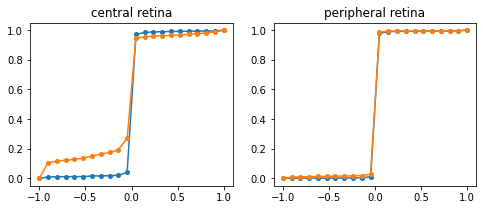

In [830]:
fig, ax = plt.subplots(1,2, figsize = (8, 3))
x, b = np.histogram(r_sig_diff, bins = 21, range=(-1,1))
x = np.r_[0,x]
ax[0].plot(b, np.cumsum(x)/np.sum(x), '-o', markersize = 4)

x, b = np.histogram(r_sig_diff_a, bins = 21, range=(-1,1))
x = np.r_[0,x]
ax[0].plot(b, np.cumsum(x)/np.sum(x), '-o', markersize = 4)
# ax[0].set_ylim([0, 1.01])


x, b = np.histogram(p_sig_diff, bins = 21, range=(-1,1))
x = np.r_[0,x]
ax[1].plot(b, np.cumsum(x)/np.sum(x), '-o', markersize = 4)

x, b = np.histogram(p_sig_diff_a, bins = 21, range=(-1,1))
x = np.r_[0,x]
ax[1].plot(b, np.cumsum(x)/np.sum(x), '-o', markersize = 4)
# ax[1].set_ylim([0, 1.01])
ax[0].set_title("central retina")
ax[1].set_title("peripheral retina")


In [843]:
# fig, ax = plt.subplots(1, 2, figsize = (10, 4))

window = 2.5
r_max_amp = rdf['max_amplitude'][0]
p_max_amp = pdf['max_amplitude'][0]

r_g_t = np.array(r_th_gsort)
r_g_s = np.array(4*r_sl_gsort)

# r_g[r_g<=0]=r_max_amp
# r_g[r_g>=r_max_amp]=p_max_amp
r_m_t = np.array(r_th_manual)
r_m_s = np.array(4*r_sl_manual)

log_r_sig_diff = []
for i in range(len(r_g_t)):
    print(i, r_g_t[i])
    if r_m_t[i] != 0:
        r_m_sigmoid = gpa.fsigmoid(amplitides, r_m_s[i], r_m_t[i])
    else:
        
        r_m_sigmoid = np.zeros_like(amplitides)+1e-6
    
    if r_g_t[i] != 0:
        r_g_sigmoid = gpa.fsigmoid(amplitides, r_g_s[i], r_g_t[i])
    else:
        r_g_sigmoid = np.zeros_like(amplitides)+1e-6
    log_r_sig_diff += list(np.log(r_m_sigmoid)-np.log(r_g_sigmoid))
        


# r_m[r_m<=0]=0

p_g_t = np.array(p_th_gsort)
p_g_s = np.array(4*p_sl_gsort)

p_m_t = np.array(p_th_manual)
p_m_s = np.array(4*p_sl_manual)


log_p_sig_diff = []
for i in range(len(p_g_t)):
    if p_m_t[i] != 0:
        p_m_sigmoid = gpa.fsigmoid(amplitides, p_m_s[i], p_m_t[i])
    else:
        p_m_sigmoid = np.zeros_like(amplitides)+1e-6
    
    if p_g_t[i] != 0:
        p_g_sigmoid = gpa.fsigmoid(amplitides, p_g_s[i], p_g_t[i])
    else:
        p_g_sigmoid = np.zeros_like(amplitides)+1e-6
    log_p_sig_diff += list(np.log(p_m_sigmoid)-np.log(p_g_sigmoid))
        

r_a_t = np.array(r_th_autosort)
r_a_s = np.array(4*r_sl_autosort)

r_ma_t = np.array(r_th_manual_autosort)
r_ma_s = np.array(4*r_sl_manual_autosort)

log_r_sig_diff_a = []
for i in range(len(r_a_t)):
    if r_ma_t[i] != 0:
        r_ma_sigmoid = gpa.fsigmoid(amplitides, r_ma_s[i], r_ma_t[i])
    else:
        
        r_ma_sigmoid = np.zeros_like(amplitides)+1e-6
    
    if r_a_t[i] != 0:
        r_a_sigmoid = gpa.fsigmoid(amplitides, r_a_s[i], r_a_t[i])
    else:
        r_a_sigmoid = np.zeros_like(amplitides)+1e-6
    log_r_sig_diff_a += list(np.log(r_ma_sigmoid)-np.log(r_a_sigmoid))

p_a_t = np.array(p_th_autosort)
p_a_s = np.array(4*p_sl_autosort)

p_ma_t = np.array(p_th_manual_autosort)
p_ma_s = np.array(4*p_sl_manual_autosort)


log_p_sig_diff_a = []
for i in range(len(p_a_t)):
    if p_ma_t[i] != 0:
        p_ma_sigmoid = gpa.fsigmoid(amplitides, p_ma_s[i], p_ma_t[i])
    else:
        p_ma_sigmoid = np.zeros_like(amplitides)+1e-6
    
    if p_a_t[i] != 0:
        p_a_sigmoid = gpa.fsigmoid(amplitides, p_a_s[i], p_a_t[i])
    else:
        p_a_sigmoid = np.zeros_like(amplitides)+1e-6
    log_p_sig_diff_a += list(np.log(p_ma_sigmoid)-np.log(p_a_sigmoid))

raphe_eis = r_th_ei_snr[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
peripheral_eis = p_th_ei_snr[(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
cat_eis = np.concatenate((raphe_eis, peripheral_eis))




0 1.520692783786862
1 2.7297172482001657
2 2.578622165098632
3 11.610892942063597
4 2.62318683199372
5 1.7062236139212166
6 1.8740157480314965
7 3.2157030736173486
8 1.166066979911588
9 2.270570333188534
10 3.190324062180038
11 0.0
12 2.8658415129453587
13 1.0446654528453874
14 1.2486753645456323
15 1.7510849725293849
16 2.180237704302338
17 3.121631296422037
18 0.824280701374974
19 3.153085990092077
20 1.3711665975963532
21 2.688214148608168
22 2.315738865695249
23 5.881495447028558
24 1.8718795787118616
25 1.195567208153451
26 1.369251263371201
27 2.637601740486428
28 0.7646746465194668
29 1.2212002767427088
30 3.507906404514185
31 1.2932002670370104
32 3.671783216789505
33 2.3083225384449
34 24.05209752795084
35 0.0
36 2.1005451241671715
37 2.476377952755906
38 2.032972440944882
39 1.1043647965029366
40 1.551749126745972
41 1.346470797686471
42 2.0479610932268284
43 0.0
44 1.2848417290551235
45 3.052659176626012
46 1.3257742755923925
47 3.438036126775693
48 1.3630984916738498
49 0.9

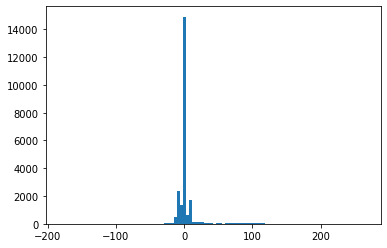

In [849]:
plt.hist(log_r_sig_diff, bins = 100);

(-0.25, 4.75)

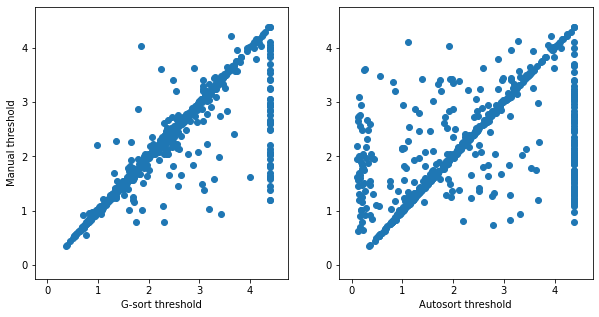

In [783]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

window = 2.5
r_max_amp = rdf['max_amplitude'][0]
p_max_amp = pdf['max_amplitude'][0]

r_g = r_th_gsort[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
r_g[r_g<=0]=r_max_amp
r_g[r_g>=r_max_amp]=p_max_amp
r_m = r_th_manual[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
r_m[r_m<=0]=0

p_g = p_th_gsort[(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
p_g[p_g<=0]=p_max_amp
p_g[p_g>=p_max_amp]=p_max_amp
p_m = p_th_manual[(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
p_m[p_m<=0]=0
cat_diff = np.concatenate((cen_diff, per_diff))
# cat_diff[cat_diff>=1]=1


r_a = r_th_autosort[(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_a[r_a<=0]=r_max_amp
r_a[r_a>=r_max_amp]=p_max_amp
r_ma = r_th_manual_autosort[(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_ma[r_ma<=0]=0
p_a = p_th_autosort[(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_a[p_a<=0]=p_max_amp
p_a[p_a>=p_max_amp]=p_max_amp
p_ma = p_th_manual_autosort[(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_ma[p_ma<=0]=0

raphe_eis = r_th_ei_snr[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
peripheral_eis = p_th_ei_snr[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
cat_eis = np.concatenate((raphe_eis, peripheral_eis))

# raphe_eis = r_th_ei_snr_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
# peripheral_eis = p_th_ei_snr_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
# cat_eis_auto = np.concatenate((raphe_eis, peripheral_eis))



        

ax[0].scatter(np.r_[p_g, r_g], np.r_[p_m, r_m])
ax[1].scatter(np.r_[p_a, r_a], np.r_[p_ma, r_ma])


ax[0].set_ylabel("Manual threshold")
# ax[1, 0].set_ylabel("Manual threshold")

ax[0].set_xlabel("G-sort threshold")
ax[1].set_xlabel("Autosort threshold")

ax[0].set_ylim([-0.25,4.75])
ax[0].set_xlim([-0.25,4.75])

ax[1].set_ylim([-0.25,4.75])
ax[1].set_xlim([-0.25,4.75])




[9.01949880e-02 8.64852967e-02 3.95503013e-08 1.79713493e-02
 2.15396286e-06 2.38407005e-02 3.48941161e-02 1.92040408e-02
 9.24415983e-01 1.32716878e+00 1.53662149e-02 2.55720760e+00
 1.26325989e+00 2.65829453e-01 8.49757255e-01 1.13312969e-02
 7.78901422e-01 1.28810478e+00 4.81528773e-02 1.08660690e+00
 2.13398477e-02 1.47360223e-01 1.50782241e+00 5.31046136e-02
 3.62726814e-01 7.00033481e-01 5.60274272e-02 3.20815920e+00
 2.91898587e+00 8.91532506e-03 2.75519904e+00 2.54723913e-04
 3.10253531e-02 1.86111959e-01 5.63807685e-03 2.09069445e-07
 4.51445910e-03 2.76087908e+00 6.84542301e-01 4.10092484e+00
 2.33714492e-03 4.59757155e-06 1.63120030e-01 4.88299354e-04
 0.00000000e+00 1.22036660e-07 6.49418769e-02 2.99147970e-02
 5.72715907e-03 3.06200787e+00 1.04136934e-03]
[1.11884933e+00 7.58078179e-02 9.17762397e-02 2.99727273e-01
 2.38810580e-03 3.01746254e-02 8.31530911e-02 1.61982801e-01
 7.83149645e-01 4.40851851e-01 2.35248503e-04 7.19912954e-01
 1.84017886e+00 7.33504911e-02 2.55704

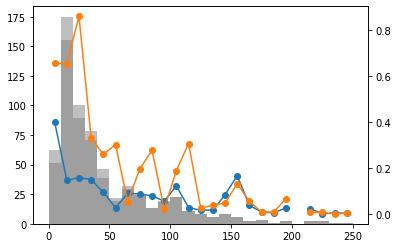

In [364]:
ax = plt.subplot(111)
ax2=ax.twinx()

window = 10
window_max = 250

cen_diff = np.abs(r_th_gsort[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]-r_th_manual[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)])
per_diff = np.abs(p_th_gsort[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]-p_th_manual[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)])
cat_diff = np.concatenate((cen_diff, per_diff))
# cat_diff[cat_diff>=1]=1


cen_diff_auto = np.abs(r_th_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]-r_th_manual_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)])
per_diff_auto = np.abs(p_th_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]-p_th_manual_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)])
cat_diff_auto = np.concatenate((cen_diff_auto, per_diff_auto))
# cat_diff_auto[cat_diff_auto>=1]=1


raphe_eis = r_ei_on_stim[(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
peripheral_eis = p_ei_on_stim[(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
cat_eis = np.concatenate((raphe_eis, peripheral_eis))

raphe_eis = r_ei_on_stim_autosort[(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
peripheral_eis = p_ei_on_stim_autosort[(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
cat_eis_auto = np.concatenate((raphe_eis, peripheral_eis))


in_range_avg = []
for i in range(int(window_max//window)):
    
    in_range = cat_diff[(cat_eis >= i*window)*(cat_eis < (i+1)*window)]
    if len(in_range)==0:
        in_range_avg += [float('nan')]
    else:
        in_range_avg += [np.mean(in_range)]
        
in_range_avg_auto = []
for i in range(int(window_max//window)):
    
    in_range = cat_diff_auto[(cat_eis_auto >= i*window)*(cat_eis_auto < (i+1)*window)]
    print(in_range)
    if len(in_range)==0:
        in_range_avg_auto += [float('nan')]
    else:
        in_range_avg_auto += [np.nanmean(in_range)]
        

ax.hist(cat_eis ,alpha=0.5, range=(0,window_max), bins=int(window_max//window) , color = "gray")
ax.hist(cat_eis_auto ,alpha=0.5, range=(0,window_max), bins=int(window_max//window) , color = "gray")

# ax2.set_ylim([0,1])
ax2.plot([window/2 + i*window for i in range(int(window_max//window))], in_range_avg, '-o')
ax2.plot([window/2 + i*window for i in range(int(window_max//window))], in_range_avg_auto, '-o')
# ax.set_xlim([0,55])


In [366]:
np.min(peripheral_eis)

7.1071600914001465

In [367]:
np.min(raphe_eis)

4.14650821685791

(0.0, 1.1)

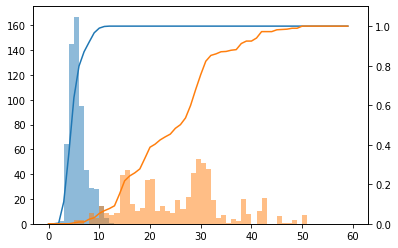

In [19]:
ax = plt.subplot(111)
window = 1
raphe_eis = r_th_ei_snr
peripheral_eis = p_th_ei_snr
ax.hist(raphe_eis,alpha=0.5, range=(0,60), bins=int(60//window) )
ax.hist(peripheral_eis, alpha=0.5, range=(0,60), bins=int(60//window))

ax2 = ax.twinx()
cs, xs = np.histogram(raphe_eis, range=(0,60), bins=int(60//window))
ax2.plot(np.cumsum(cs)/np.max(np.cumsum(cs)), '-')

cs, xs = np.histogram(peripheral_eis, range=(0,60), bins=int(60//window))

ax2.plot(np.cumsum(cs)/np.max(np.cumsum(cs)), '-')
ax2.set_ylim([0,1.1])

(array([ 0.,  0.,  0.,  0.,  0.,  4.,  2.,  8., 30., 27., 19., 21., 33.,
        28., 19., 15., 10., 14., 19., 88., 54., 42., 27.,  9., 21.,  3.,
         4., 18., 23., 17.,  9.,  9.,  4.,  9.,  2., 10.,  1., 11.,  3.,
         6.,  2.,  0.,  8.,  4.,  8.,  2.,  4.,  0.,  1.,  4.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
        220., 225., 230., 235., 240., 245., 250.]),
 <BarContainer object of 50 artists>)

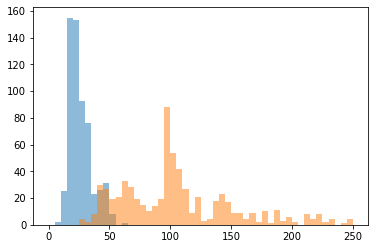

In [22]:
ax = plt.subplot(111)
window = 5
raphe_eis = r_th_ei
peripheral_eis = p_th_ei
ax.hist(raphe_eis,alpha=0.5, range=(0,250), bins=int(250//window ))
ax.hist(peripheral_eis, alpha=0.5, range=(0,250), bins=int(250//window))

Text(0.5, 1.0, 'Comparing SNR across retinal regions')

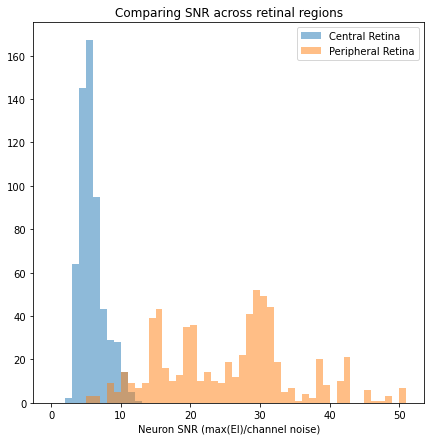

In [34]:
fig, ax = plt.subplots(1, 1, figsize = (5,5))
window = 1
raphe_eis = r_th_ei_snr
peripheral_eis = p_th_ei_snr
ax.hist(raphe_eis,alpha=0.5, range=(0,51), bins=int(51//window ), label = "Central Retina")
ax.hist(peripheral_eis, alpha=0.5, range=(0,51), bins=int(51//window), label = "Peripheral Retina")
ax.set_xlabel('Neuron SNR (max(EI)/channel noise)')
ax.legend()
ax.set_title('Comparing SNR across retinal regions')


In [37]:
import electrode_map

[]

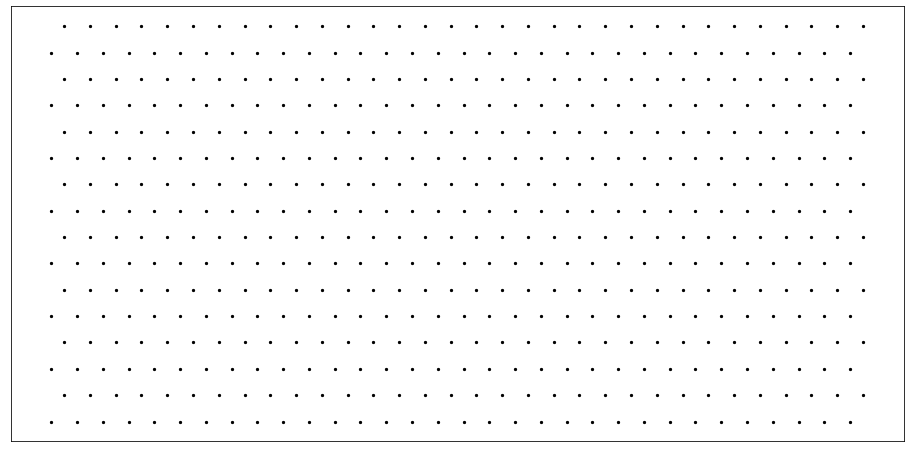

In [62]:
# %matplotlib notebook
# Constants.
NUM_SIGMAS = 2 # Kind of low, but at least it's noise-based.
SIZE_SCALAR = 5 

fig,ax = plt.subplots(1,1,figsize=(16,8))


# Get the electrode map to plot on the array.
e_map = electrode_map.LITKE_512_ARRAY_MAP
xcoords = e_map[:,0]
ycoords = e_map[:,1]
num_channels = e_map.shape[0]

ax.scatter(xcoords,ycoords,
           c='k',s=5)
ax.set_xticks([])
ax.set_yticks([])
# ax.axis('off') 


(-396.0, 396.0, -429.0, 429.0)

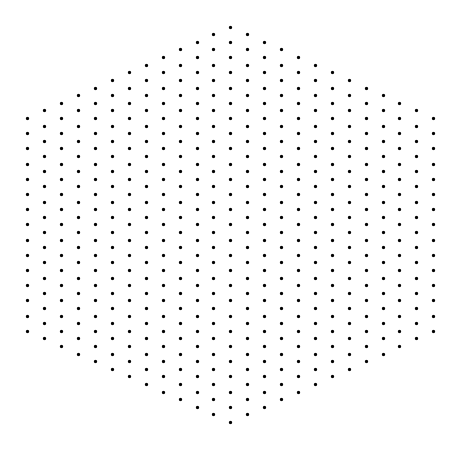

In [61]:
# %matplotlib notebook
# Constants.
NUM_SIGMAS = 2 # Kind of low, but at least it's noise-based.
SIZE_SCALAR = 5 

fig,ax = plt.subplots(1,1,figsize=(8,8))


# Get the electrode map to plot on the array.
e_map = electrode_map.LITKE_519_ARRAY_MAP
xcoords = e_map[:,0]
ycoords = e_map[:,1]
num_channels = e_map.shape[0]

ax.scatter(xcoords,ycoords,
           c='k',s=5)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')


In [2]:
filepath = '/Volumes/Scratch/Users/jeffbrown/e-stim-data/'
dataset = '2019-06-20-0/'

PARENT_ANALYSIS = '/Volumes/Analysis/'
PARENT_DATA = '/Volumes/Data/'
vstim_analysis_path = PARENT_ANALYSIS+dataset + 'kilosort_data000/'
# vstim_analysis_path = PARENT_ANALYSIS+dataset

estim_analysis_path = PARENT_ANALYSIS+dataset

# PARENT_ANALYSIS = '/Volumes/Acquisition/Analysis/'
# PARENT_DATA = '/Volumes/Data/'
# vstim_analysis_path = PARENT_ANALYSIS+dataset 
# estim_analysis_path = '/Volumes/Analysis/'+dataset

data_path = PARENT_DATA+dataset
# estim_datarun = 'data001'
estim_datarun = 'data001'
vstim_datarun = 'data000'

vstim_data = vl.load_vision_data(vstim_analysis_path + vstim_datarun,
                                  vstim_datarun,
                                  include_params=True,
                                  include_ei=True,
                                  include_noise=True,
                                  include_neurons=True
                                 )
noise = vstim_data.channel_noise

excluded_types = ['par', 'dup']
MIN_CORR = .975
duplicates = set()
cellids = vstim_data.get_cell_ids()
for cell in cellids:
    cell_ei = vstim_data.get_ei_for_cell(cell).ei
    cell_ei_error = vstim_data.get_ei_for_cell(cell).ei_error
    cell_ei_max = np.abs(np.amin(cell_ei,axis=1))
    cell_ei_power = np.sum(cell_ei**2,axis=1)
    celltype = vstim_data.get_cell_type_for_cell(cell).lower()
    if "dup" in celltype or "bad" in celltype:
        continue 
    if "parasol" in celltype:
        celltype = 'parasol'
    elif "midget" in celltype:
        celltype = 'midget'
    elif "sbc" in celltype:
        celltype = 'sbc'
    else:
        celltype = 'other'
    for other_cell in cellids:
        other_celltype = vstim_data.get_cell_type_for_cell(other_cell).lower()
        if cell == other_cell or cell in duplicates or other_cell in duplicates:
            continue
        if "dup" in other_celltype or "bad" in other_celltype:
            continue
        if "parasol" in other_celltype:
            other_celltype = 'parasol'
        elif "midget" in other_celltype:
            other_celltype = 'midget'
        elif "sbc" in other_celltype:
            other_celltype = 'sbc'
        else:
            other_celltype = 'other'
        # Quit out if both cell types are in the big five.
        if celltype in ['parasol','midget','sbc'] and other_celltype in ['parasol','midget','sbc']:
            continue
        other_cell_ei = vstim_data.get_ei_for_cell(other_cell).ei
        other_cell_ei_max = np.abs(np.amin(other_cell_ei,axis=1))
        other_cell_ei_power = np.sum(other_cell_ei**2,axis=1)
        # Compute the correlation and figure out if we have duplicates: take the larger number of spikes.
        corr = np.corrcoef(cell_ei_power,other_cell_ei_power)[0,1]
        if corr >= MIN_CORR:
            n_spikes_cell = vstim_data.get_spike_times_for_cell(cell).shape[0]
            n_spikes_other_cell = vstim_data.get_spike_times_for_cell(other_cell).shape[0]
            # Take the larger number of spikes, unless the one with fewer is a light responsive type.
            if celltype in ['parasol','midget','sbc'] or n_spikes_cell > n_spikes_other_cell:
                duplicates.add(other_cell)
            else:
                duplicates.add(cell)
                
noise = vstim_data.channel_noise

for cell in set(cellids).difference(duplicates):
    cell_ei_error = vstim_data.get_ei_for_cell(cell).ei_error[noise != 0]
    
    if np.any(cell_ei_error == 0):
        duplicates.add(cell)       


In [3]:
p = 58
k = 30
n = 51
rat = 2
cell_spike_window = 25 
max_electrodes_considered = 30
excluded_types = ['dup','bad']
compartments = ['soma', 'mixed']
time_limit = 55
shift_window=[0, 55]


ei = vstim_data.get_ei_for_cell(n).ei
num_electrodes = ei.shape[0]
if num_electrodes == 519:
    array_id = 1502
else:
    
    array_id = 502

cell_power = ei**2
            
            
      
            
            
e_sorted = np.argsort(np.sum(ei**2, axis = 1))[::-1]

e_sorted = [e for e in e_sorted if eil.axonorsomaRatio(ei[e,:]) in compartments]


cell_power = ei**2
power_ordering = np.argsort(cell_power, axis = 1)[:,::-1]
significant_electrodes = np.argwhere(np.sum(np.take_along_axis(cell_power[e_sorted], power_ordering[e_sorted,:cell_spike_window], axis = 1), axis = 1) >= rat * cell_spike_window * np.array(noise[e_sorted])**2).flatten()

electrode_list = list(np.array(e_sorted)[significant_electrodes][:max_electrodes_considered])



data_on_cells = get_center_eis(cell, electrode_list, ap = (vstim_analysis_path, vstim_datarun), excluded_types = excluded_types, excluded_cells = list(duplicates), power_threshold=1.5, array_id = array_id, sample_len_left = time_limit ,sample_len_right = time_limit)
           
cell_ids, cell_eis, cell_error, cell_spk_times = data_on_cells

significant_electrodes = np.arange(len(electrode_list))





signal = get_oldlabview_pp_data(estim_analysis_path + estim_datarun , p, k)[:,:,:time_limit]# - signal_trace0

num_trials = len(signal)
raw_signal = signal[:, electrode_list, shift_window[0]:shift_window[1]].astype(float) #.reshape(num_trials, (R_SAMPLES-L_SAMPLES)*len(electrode_list))

finished, G, (initial_event_labels, signals_tmp), (event_labels_with_virtual, signals), (final_event_labels, final_signals), edge_to_matched_signals, tracker, mask, notes = spike_sorter_EA(n, significant_electrodes, electrode_list, raw_signal, 1, 1000, noise, data_on_cells, artifact_cluster_estimate=None, damping = 0.5)


In [4]:
def swap_labels(x, i, j):
    x_ = copy.copy(x)
    
    x[x_ == i] = j
    x[x_ == j] = i
    return x

initial_event_labels = swap_labels(initial_event_labels, 0, 1)

(array([-450., -425., -400., -375., -350., -325., -300., -275., -250.,
        -225., -200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

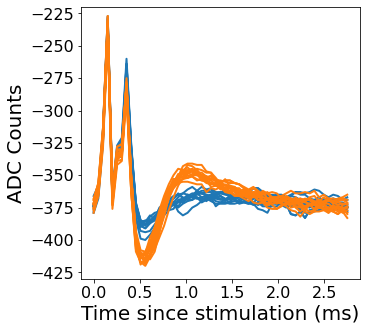

In [5]:
fig, ax = plt.subplots(1,1, figsize = (5, 5))
#ax.set_title("p %s e %s k %s" %(p, e, k))
j = 0

SMALL_SIZE = 8
MEDIUM_SIZE = 20
BIGGER_SIZE = 12


for i, l in enumerate(list(set(initial_event_labels))):
    
    ax.plot(np.linspace(0, time_limit/20, time_limit), raw_signal[initial_event_labels == l, :].reshape((-1, len(electrode_list)*55))[0, j*55:(j+1)*55].T,linewidth=2, color = "C"+str(i%10), label = f"C^({i})");
    
    ax.plot(np.linspace(0, time_limit/20, time_limit), raw_signal[initial_event_labels == l, :].reshape((-1, len(electrode_list)*55))[:, j*55:(j+1)*55].T,linewidth=2, color = "C"+str(i%10));
    ax.set_ylim([-430,-220])
    #ax[i].set_ylabel("adc counts")
    
    # ax.set_xlabel("Time since stimulation (ms)")
    ax.set_ylabel("ADC Counts", fontsize = 20)
    ax.set_xlabel("Time since stimulation (ms)", fontsize = 20)
#     ax.set_yticklabels()
# ax.legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# ax.set_title("signal traces")


In [20]:
ax.get_yticklabels()

[Text(0, -450.0, ''),
 Text(0, -425.0, ''),
 Text(0, -400.0, ''),
 Text(0, -375.0, ''),
 Text(0, -350.0, ''),
 Text(0, -325.0, ''),
 Text(0, -300.0, ''),
 Text(0, -275.0, ''),
 Text(0, -250.0, ''),
 Text(0, -225.0, ''),
 Text(0, -200.0, '')]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([-450., -425., -400., -375., -350., -325., -300., -275., -250.,
        -225., -200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

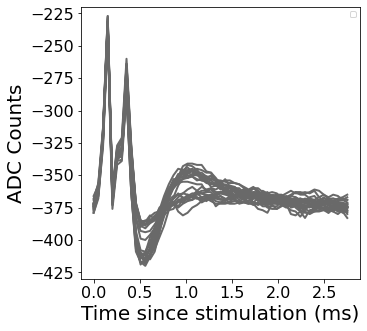

In [26]:
fig, ax = plt.subplots(1,1, figsize = (5, 5))
#ax.set_title("p %s e %s k %s" %(p, e, k))
j = 0


for i, l in enumerate(list(set(initial_event_labels))):
    
    
    ax.plot(np.linspace(0, time_limit/20, time_limit), raw_signal[initial_event_labels == l, :].reshape((-1, len(electrode_list)*55))[:, j*55:(j+1)*55].T,linewidth=2, color =  "dimgray");
    ax.set_ylim([-430,-220])
    #ax[i].set_ylabel("adc counts")
    ax.set_ylabel("ADC Counts", fontsize = 20)
    ax.set_xlabel("Time since stimulation (ms)", fontsize = 20)
    
    ax.set_xlabel("Time since stimulation (ms)")
    ax.set_ylabel("ADC Counts")
ax.legend()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# ax.set_title("signal traces")

In [28]:
difference_signals, event_signal_ordering = compute_difference_signals(signals, initial_event_labels)

(array([-30., -20., -10.,   0.,  10.,  20.,  30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

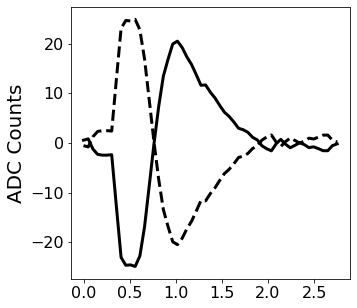

In [50]:
fig, ax = plt.subplots(1,1, figsize = (5, 5))
j = 0
ax.plot(np.linspace(0, time_limit/20, time_limit), difference_signals[0][j],color='black', label = "D^(0, 1)", linewidth = 3)
ax.plot(np.linspace(0, time_limit/20, time_limit),difference_signals[1][j], '--',color='black', label = "D^(1, 0)", linewidth = 3)
ax.set_ylabel("ADC Counts")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# ax.legend()

(array([-30., -20., -10.,   0.,  10.,  20.,  30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

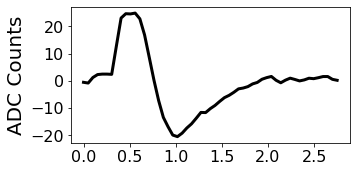

In [62]:
fig, ax = plt.subplots(1,1, figsize = (5, 2.5))
j = 0

ax.plot(np.linspace(0, time_limit/20, time_limit), difference_signals[1][j],color='black', label = "D^(0, 1)", linewidth = 3)
ax.set_ylabel("ADC Counts")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# ax[1].plot(np.linspace(0, time_limit/20, time_limit),difference_signals[1][j], color='black', label = "D^(1, 0)", linewidth = 3)

# ax[1].set_ylabel("ADC Counts")
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
# ax.legend()

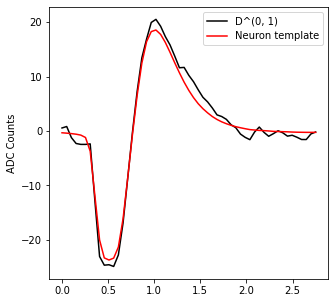

In [80]:
fig, ax = plt.subplots(1,1, figsize = (5, 5))
j = 0
ax.plot(np.linspace(0, time_limit/20, time_limit), difference_signals[0][j], color='black', label = "D^(0, 1)")

ax.plot(np.linspace(0, time_limit/20, time_limit), edge_to_matched_signals[((1, 0),51)][1][j], color='red', label = "Neuron template")
ax.set_ylabel("ADC Counts")

ax.legend()

In [63]:
from scipy.ndimage.interpolation import shift


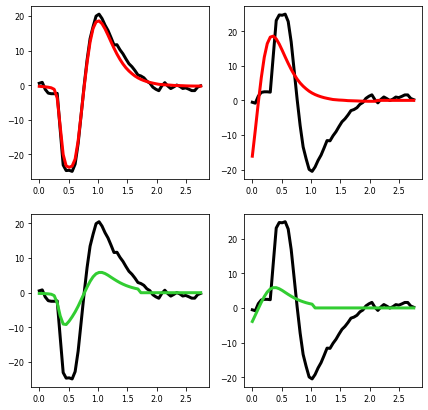

In [76]:
fig, ax = plt.subplots(2,2, figsize = (7, 7))
j = 0

ax[0,0].plot(np.linspace(0, time_limit/20, time_limit), difference_signals[0][j], color='black', label = "D^(0, 1)", linewidth = 3)
error = []
for t in np.arange(-70, 70):
    waveformA = shift(edge_to_matched_signals[((1, 0),51)][1][j], t)
    error += [np.linalg.norm(difference_signals[0][j] - waveformA)]
min_shift = np.argmin(error)-70
waveformA = shift(edge_to_matched_signals[((1, 0),51)][1][j], min_shift)

ax[0,0].plot(np.linspace(0, time_limit/20, time_limit), waveformA, color='red', label = "Neuron 1 template", linewidth = 3)


# ax[0,0].set_ylabel("ADC Counts")
# ax[0,0].set_title("D^(0,1)")


ax[1,0].plot(np.linspace(0, time_limit/20, time_limit), difference_signals[0][j], color='black', label = "D^(0, 1)", linewidth = 3)
competing_cell = 3
error = []
for t in np.arange(-70, 70):
    waveformA = shift(cell_eis[competing_cell][j][25:80], t)
    error += [np.linalg.norm(difference_signals[0][j] - waveformA)]
min_shift = np.argmin(error)-70
waveformA = shift(cell_eis[competing_cell][j][25:80], min_shift)

ax[1,0].plot(np.linspace(0, time_limit/20, time_limit), waveformA, color='limegreen', label = "Neuron 1 template", linewidth = 3)
# ax[1,0].set_ylabel("ADC Counts")
# ax[1,0].set_xlabel("Time since stimulation (ms)")

ax[0,1].plot(np.linspace(0, time_limit/20, time_limit), difference_signals[1][j], color='black', label = "D^(0, 1)", linewidth = 3)
error = []
for t in np.arange(-70, 70):
    waveformA = shift(edge_to_matched_signals[((1, 0),51)][1][j], t)
    error += [np.linalg.norm(difference_signals[1][j] - waveformA)]
min_shift = np.argmin(error)-70
waveformA = shift(edge_to_matched_signals[((1, 0),51)][1][j], min_shift)
ax[0,1].plot(np.linspace(0, time_limit/20, time_limit), waveformA, color='red', label = "Neuron 1 template", linewidth = 3)
# ax[0,1].set_title("D^(1,0)")


ax[1,1].plot(np.linspace(0, time_limit/20, time_limit), difference_signals[1][j], color='black', label = "D^(0, 1)", linewidth = 3)
error = []
for t in np.arange(-70, 70):
    waveformA = shift(cell_eis[competing_cell][j][25:80], t)
    error += [np.linalg.norm(difference_signals[1][j] - waveformA)]
min_shift = np.argmin(error)-70
waveformA = shift(cell_eis[competing_cell][j][25:80], min_shift)
ax[1,1].plot(np.linspace(0, time_limit/20, time_limit), waveformA, color='limegreen', label = "Neuron 1 template", linewidth = 3)
# ax[1,1].set_xlabel("Time since stimulation (ms)")
ax[1, 1].yaxis.set_label_position("right")
# ax[1, 1].set_ylabel("Neuron B")


# ax[0, 1].yaxis.tick_right()
# ax[0, 1].yaxis.set_label_position("right")
# ax[0, 1].set_ylabel("Neuron A")
# ax.legend()

In [85]:
len(cell_eis)

12

In [122]:
cell_eis[0].shape

(7, 110)

In [112]:
error = []
for t in np.arange(-70, 70):
    waveformA = shift(edge_to_matched_signals[((1, 0),51)][1][j], t)
    error += [np.linalg.norm(difference_signals[1][j] - waveformA)]

In [113]:
np.argmin(error)

57

# Create sigmoid plot for multigraph

In [20]:
# outpath = '/Volumes/Scratch/Users/jeffbrown/final_tests6/2016-06-13-0/data001/kilosort_data000/data000'
outpath = '/Volumes/Scratch/Users/jeffbrown/short-window-consensus5/2016-02-17-5/data001-data002-new/data003'
parameters = loadmat(os.path.join(outpath, 'parameters.mat'))
cells = parameters['cells'].flatten()
sorted_cells = parameters['gsorted_cells'].flatten()
num_cells = len(cells)
num_patterns = max(parameters['patterns'].flatten())
num_movies = parameters['movies'].flatten()[0]
init_probs_fp = np.memmap(os.path.join(outpath, 'init_probs.dat'),mode='r',shape=(num_cells, num_patterns, num_movies), dtype='float32')
final_probs_fp = np.memmap(os.path.join(outpath, 'final_probs.dat'),mode='r',shape=(num_cells, num_patterns, num_movies), dtype='float32')



(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 432x288 with 0 Axes>

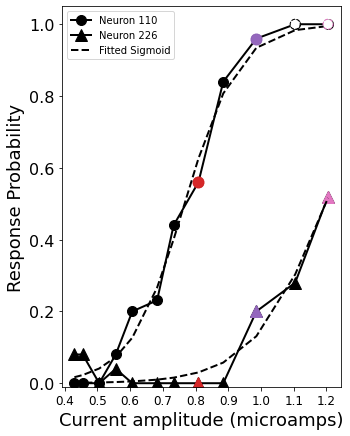

In [36]:
p = 16

c1 = 110
c2 = 226

amps0 = np.array([0.10053543, 0.11310236, 0.11938583, 0.13195276, 0.14451969,
                   0.16337008, 0.17593701, 0.1947874 , 0.2136378 , 0.23877165,
                   0.25762205, 0.2780315 , 0.30330709, 0.35385827, 0.37913386,
                   0.42968504, 0.45496063, 0.50551181, 0.55606299, 0.60661417,
                   0.68244094, 0.73299213, 0.8088189 , 0.88464567, 0.98574803,
                   1.10433071, 1.20472441, 1.30511811, 1.40551181, 1.60629921,
                   1.70669291, 1.90748031, 2.10826772, 2.30905512, 2.50984252,
                   2.81102362, 3.11220472, 3.41338583, 3.71456693])

probs = np.array(init_probs_fp[:,p-1,:])
fprobs = np.array(final_probs_fp[:,p-1,:])
plt.figure()
fig, ax = plt.subplots(1, 1, figsize = (5, 7))

ci = list(cells).index(c1)
prob=probs[ci]
prob = gpa.disambiguate_sigmoid(prob)
threshold1,slope1,amps,prob1 = smart_fit(amps0,prob)
                

ax.plot(amps0[15:27], prob1[15:27].T,"-o", label =f"Neuron {cells[ci]}" , color = "black", markersize = 10, linewidth = 2, zorder = 1);

ax.plot(amps0[22], prob1[22].T,"-o",  color = "C3", markersize = 11, linewidth = 2, zorder = 1);
ax.plot(amps0[24], prob1[24].T,"-o",color = "C4", markersize = 11, linewidth = 2, zorder = 1);


ci = list(cells).index(c2)
prob=probs[ci]
prob = gpa.disambiguate_sigmoid(prob)
threshold2,slope2,amps,prob2 = smart_fit(amps0[:27],prob[:27],pointsToCut=2)

ax.plot(amps0[15:27], prob2[15:27].T,"-^", label =f"Neuron {cells[ci]}" , color = "black", markersize = 12, linewidth = 2, zorder =1);
ax.plot(amps0[22], prob2[22].T,"-^", color = "C3", markersize = 12, linewidth = 2, zorder =2);
ax.plot(amps0[24], prob2[24].T,"-^", color = "C4", markersize = 12, linewidth = 2, zorder =2);
ax.plot(amps0[26], prob2[26].T,"-^", color = "C6", markersize = 12, linewidth = 2, zorder =2);

ax.plot(amps0[15:27], sigmoid(amps0[15:27], 4*slope1, threshold1),"--", label =f"Fitted Sigmoid" , color = "black", markersize = 10, linewidth = 2, zorder =1);
ax.plot(amps0[15:27], sigmoid(amps0[15:27], 4*slope2, threshold2),"--" , color = "black", markersize = 10, linewidth = 2, zorder =1);

ax.scatter(amps0[26], prob1[26].T,s = 100,linestyle= "--", edgecolors = "C6", facecolors = "white", zorder = 2);
ax.scatter(amps0[25], prob1[25].T,s = 100,linestyle= "--", facecolors = "white", edgecolors = "black");


ax.legend()

# ax.set_title(cells[ci])
ax.set_ylim([-0.01,1.05])
ax.set_xlabel("Current amplitude (microamps)", fontsize = 18)
ax.set_ylabel("Response Probability", fontsize = 18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=16)

# for ci, (prob, fprob) in enumerate(zip(probs, fprobs)):
#     if max(prob) > 0.5:
        
#         ax.plot(amps0[15:27], prob[15:27].T,"-o", label =cells[ci] , color = "black");
# #         ax.plot(fprob.T,"-o", label =cells[ci] );
#         ax.set_title(cells[ci])
#         ax.set_ylim([0,1])
# # ax.legend()
    


# Produce scatterplot

In [20]:
file = open('/Volumes/Lab/Users/Sasi/pystim/scripts/ei_erf_analysis/ei_erf_final_push_june20/dfMMergedEiErf.p', 'rb')
dfMMergedAll4 = pickle.load(file)

dfMan = dfMMergedAll4[dfMMergedAll4['threshold_manual'].between(0,5,inclusive=False)]


/tmp/ipykernel_30581/2595756558.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  dfMan = dfMMergedAll4[dfMMergedAll4['threshold_manual'].between(0,5,inclusive=False)]


In [21]:
badAutosort = ['2015-11-09-3/-7081-5-data000','2015-11-09-3/-1081-72-data000','2015-11-09-3/-966-80-data000',
               '2015-11-09-3/-993-58-data000','2015-11-09-3/-4774-310-data000','2015-11-09-3/-6076-405-data000',
               '2015-11-09-3/-6076-413-data000','2015-11-09-3/-6813-453-data000','2015-11-09-3/-6931-462-data000',
               '2015-11-09-3/-6931-469-data000','2016-01-05-6/-304-32-data001','2016-01-05-6/-3976-70-data001',
               '2016-01-05-6/-1804-121-data001','2016-01-05-6/-1711-122-data001','2016-01-05-6/-2432-162-data001',
               '2016-01-05-6/-5002-320-data001','2016-01-05-6/-7026-475-data001','2016-01-05-6/-7126-475-data001',
               '2015-05-27-0/-6856-0-data000','2015-05-27-0/-7206-2-data000','2015-05-27-0/-154-104-data000',
               '2015-09-23-3/-3347-257-data005','2015-05-27-0/-5629-358-data000','2015-09-23-3/-4042-272-data005',
               '2015-09-23-3/-4578-293-data005','2015-09-23-3/-5061-337-data005','2015-09-23-3/-5237-341-data005',
               '2015-09-23-3/-4936-329-data005','2015-04-09-2/-7321-6-data001','2015-04-09-2/-256-20-data001',
               '2015-04-09-2/-1231-78-data001','2015-04-09-2/-1231-85-data001','2015-04-09-2/-1336-85-data001',
               '2015-04-09-2/-7321-488-data001','2012-09-24-0/-332-19-data006','2012-09-24-0/-1816-121-data006',
               '2012-09-24-0/-3226-214-data006','2012-09-24-0/-4696-309-data006','2012-09-24-0/-7025-468-data006',
               '2012-09-24-0/-7025-469-data006','2016-04-21-10/-4222-88-data001','2016-04-21-10/-5011-338-data001',
               '2016-04-21-10/-6513-450-data001','2015-10-06-6/-785-36-data002','2015-10-06-6/-738-52-data002',
               '2015-10-06-6/-3196-205-data002','2015-10-06-6/-1801-259-data002','2017-10-30-2/-3320-253-data000',
               '2017-10-30-2/-3320-254-data000','2017-10-30-2/-4577-305-data000','2015-03-09-0/-5057-325-data000',
               '2015-03-09-0/-5182-358-data000','2020-01-30-5/-4036-262-data000','2018-02-09-5/-215-19-data000',
               '2018-02-09-5/-3888-124-data000']
badAutosort2 = ['2015-11-09-3/-5583-372-data000','2015-11-09-3/-6335-415-data000','2015-11-09-3/-6335-421-data000',
                '2015-09-23-3/-4666-311-data005','2012-09-24-0/-94-11-data006','2012-09-24-0/-1816-203-data006',
                '2012-09-24-0/-6241-288-data006','2012-09-24-0/-6827-302-data006','2012-09-24-0/-6376-416-data006',
                '2016-04-21-10/-4222-286-data001','2016-04-21-10/-5116-337-data001','2016-04-21-10/-6513-507-data001',
                '2015-10-06-6/-738-49-data002','2015-10-06-6/-871-278-data002','2017-10-30-2/-4576-46-data000',
                '2015-03-09-0/-5182-350-data000','2018-02-09-5/-1188-366-data000','2016-04-21-10/-3451-222-data001'] #found on 2nd in-depth pass below

In [24]:
def refit(row):
    #remove first TWO points
    pointsToCut = 2
    if not np.all(np.isnan(row['probs_gsort'])):
        threshJ,slopeJ = gpa.infer_sigmoid(np.array(row['probs_gsort'][pointsToCut:]),
                                           np.array(row['amps_gsort'][pointsToCut:]),
                                           mono_threshold=0.10,noise_limit=0.19, kind='add')
                                           #mono_threshold=0.05,noise_limit=0.05, kind='add')
    else:
        threshJ,slopeJ = [np.nan,np.nan]
    return threshJ,slopeJ



dfMan['threshold_smart_filtered_mod_elec_noise_error'],dfMan['slope_smart_filtered_mod_elec_noise_error'] = zip(*dfMan.apply(refit,axis=1))

def refitMan(row):
    pointsToCut = 0
    if not np.all(np.isnan(row['probs_manual'])):
        threshJ,slopeJ = gpa.infer_sigmoid(np.array(row['probs_manual'][pointsToCut:]),
                                           np.array(row['amps_manual'][pointsToCut:]),
                                           mono_threshold=0.10,noise_limit=0.19, kind='add')
                                           #mono_threshold=0.05,noise_limit=0.05, kind='add')
    else:
        threshJ,slopeJ = [np.nan,np.nan]
    return threshJ,slopeJ

dfMan['threshold_manual_smart'],dfMan['slope_manual_smart'] = zip(*dfMan.apply(refitMan,axis=1))

# dfMan= dfMan[~(dfMan['piece-cell-electrode-ei'].isin(badAutosort+badAutosort2))]
dfMan= dfMan[~(dfMan['piece-cell-electrode-ei'].isin(badAutosort+badAutosort2))]

/tmp/ipykernel_30581/3742116209.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMan['threshold_smart_filtered_mod_elec_noise_error'],dfMan['slope_smart_filtered_mod_elec_noise_error'] = zip(*dfMan.apply(refit,axis=1))
/tmp/ipykernel_30581/3742116209.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMan['threshold_smart_filtered_mod_elec_noise_error'],dfMan['slope_smart_filtered_mod_elec_noise_error'] = zip(*dfMan.apply(refit,axis=1))
/tmp/ipykernel_30581/3742116209.py:28: SettingWithCopyWarning:

Text(0.5, 1.0, 'Macaque Peripheral Retina (60-micron MEA)')

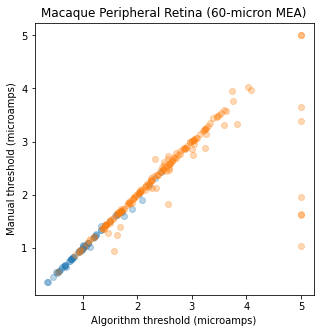

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5 )) 
dfManTmp = dfMan[(dfMan['threshold_manual_smart']<=dfMan['bthr']) & (dfMan['probs_manual'].apply(max) >= 0.5)]
max_amps = dfManTmp['amps_manual'].apply(max)
gsort_thresholds = dfManTmp['threshold_smart_filtered_mod_elec_noise_error'].clip(0, 5)
manual_thresholds = dfManTmp['threshold_manual_smart'].clip(0, 5)
gsort_thresholds[gsort_thresholds> max_amps] = 5
manual_thresholds[manual_thresholds> max_amps] = 5
diff = manual_thresholds.to_numpy()-gsort_thresholds.to_numpy()
ax.scatter(gsort_thresholds,manual_thresholds,alpha=.3, color = "C0")

dfManTmp = dfMan[(dfMan['threshold_manual_smart']>dfMan['bthr']) & (dfMan['probs_manual'].apply(max) >= 0.5)]
max_amps = dfManTmp['amps_manual'].apply(max)

gsort_thresholds = dfManTmp['threshold_smart_filtered_mod_elec_noise_error'].clip(0, 5)
manual_thresholds = dfManTmp['threshold_manual_smart'].clip(0, 5)
gsort_thresholds[gsort_thresholds> max_amps] = 5
manual_thresholds[manual_thresholds> max_amps] = 5

diff = manual_thresholds.to_numpy()-gsort_thresholds.to_numpy()
ax.scatter(gsort_thresholds,manual_thresholds,alpha=.3, color = "C1", )
ax.set_xlabel("Algorithm threshold (microamps)")
ax.set_ylabel("Manual threshold (microamps)")
ax.set_title("Macaque Peripheral Retina (60-micron MEA)")
# ax.scatter(gsort_thresholds[np.abs(diff) > 0.3],manual_thresholds[np.abs(diff) > 0.3], )
# ax.set_ylim([-0.1, max(max_amps)])
# ax.set_xlim([-0.1, max(max_amps)])

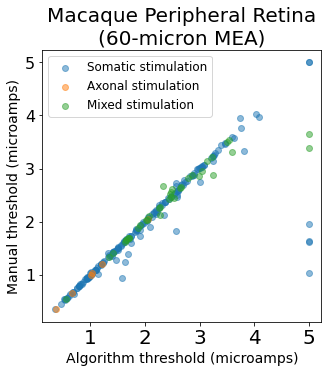

In [69]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5 )) 
plt.xticks(fontsize=20)
plt.yticks(fontsize=16)
dfManTmp = dfMan[(dfMan['compartment']=='soma') & (dfMan['probs_manual'].apply(max) >= 0.5)]
max_amps = dfManTmp['amps_manual'].apply(max)
gsort_thresholds = dfManTmp['threshold_smart_filtered_mod_elec_noise_error'].clip(0, 5)
manual_thresholds = dfManTmp['threshold_manual_smart'].clip(0, 5)
gsort_thresholds[gsort_thresholds> max_amps] = 5
manual_thresholds[manual_thresholds> max_amps] = 5
diff = manual_thresholds.to_numpy()-gsort_thresholds.to_numpy()
ax.scatter(gsort_thresholds,manual_thresholds,alpha=.5, color = "C0", label = "Somatic stimulation")

dfManTmp = dfMan[(dfMan['compartment']=='axon') & (dfMan['probs_manual'].apply(max) >= 0.5)]
max_amps = dfManTmp['amps_manual'].apply(max)
gsort_thresholds = dfManTmp['threshold_smart_filtered_mod_elec_noise_error'].clip(0, 5)
manual_thresholds = dfManTmp['threshold_manual_smart'].clip(0, 5)
gsort_thresholds[gsort_thresholds> max_amps] = 5
manual_thresholds[manual_thresholds> max_amps] = 5
diff = manual_thresholds.to_numpy()-gsort_thresholds.to_numpy()
ax.scatter(gsort_thresholds,manual_thresholds,alpha=.5, color = "C1", label = "Axonal stimulation")

dfManTmp = dfMan[(dfMan['compartment']=='mixed') & (dfMan['probs_manual'].apply(max) >= 0.5)]
max_amps = dfManTmp['amps_manual'].apply(max)
gsort_thresholds = dfManTmp['threshold_smart_filtered_mod_elec_noise_error'].clip(0, 5)
manual_thresholds = dfManTmp['threshold_manual_smart'].clip(0, 5)
gsort_thresholds[gsort_thresholds> max_amps] = 5
manual_thresholds[manual_thresholds> max_amps] = 5
diff = manual_thresholds.to_numpy()-gsort_thresholds.to_numpy()
ax.scatter(gsort_thresholds,manual_thresholds,alpha=.5, color = "C2", label = "Mixed stimulation")


ax.set_xlabel("Algorithm threshold (microamps)", fontsize = 14)
ax.set_ylabel("Manual threshold (microamps)", fontsize = 14)
ax.set_title("Macaque Peripheral Retina\n(60-micron MEA)", fontsize = 20)
ax.legend(fontsize = 12)

# ax.scatter(gsort_thresholds[np.abs(diff) > 0.3],manual_thresholds[np.abs(diff) > 0.3], )
# ax.set_ylim([-0.1, max(max_amps)])
# ax.set_xlim([-0.1, max(max_amps)])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


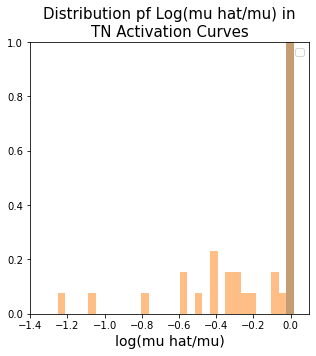

In [194]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

dfManTmp = dfMan[ (dfMan['probs_manual'].apply(max) < 0.5)]
max_amps = dfManTmp['amps_manual'].apply(max)
gsort_thresholds = dfManTmp['threshold_smart_filtered_mod_elec_noise_error'].clip(0, 5)
manual_thresholds = dfManTmp['threshold_manual_smart'].clip(0, 5)
gsort_thresholds[gsort_thresholds> max_amps] = 5
manual_thresholds[manual_thresholds> max_amps] = 5
diff = manual_thresholds.to_numpy()/gsort_thresholds.to_numpy()
# diff[np.isnan(diff)] = 0
# ax.scatter(gsort_thresholds,manual_thresholds,alpha=.5, color = "C0")


log_ratio_manual_60 = np.log(diff)
log_ratio_manual_60 = log_ratio_manual_60[~np.isnan(log_ratio_manual_60)]

ax.hist(log_ratio_manual_60, bins = 100, range = (-4, 0.1), density = True, alpha = 0.5)
# x = np.r_[0,x]

# ax.plot(b, np.cumsum(x)/np.sum(x), '-', markersize = 4, label = "Peripheral retina")
ax.set_xlabel("log(mu hat/mu)", fontsize = 14)
# ax.set_ylabel("Manual threshold (microamps)", fontsize = 14)
ax.set_title("Distribution pf Log(mu hat/mu) in\nTN Activation Curves", fontsize = 15)
# ax.legend(fontsize = 12)



window = 2.5
r_max_amp = rdf['max_amplitude'][0]
p_max_amp = pdf['max_amplitude'][0]



r_g = r_th_gsort[((r_th_manual >rdf['max_amplitude'][0]) + (r_th_manual== 0))]
r_g[r_g >rdf['max_amplitude'][0]] = rdf['max_amplitude'][0]
r_g[r_g==0] = rdf['max_amplitude'][0]

r_m = r_th_manual[((r_th_manual >rdf['max_amplitude'][0]) +(r_th_manual== 0))]
r_m[r_m >rdf['max_amplitude'][0]] = rdf['max_amplitude'][0]
r_m[r_m==0]=rdf['max_amplitude'][0]

ax.hist(np.log((r_g)/(r_m)), bins = 100, range = (-4, 0.1), density = True, alpha = 0.5)

# ax.plot(b[1:], np.cumsum(x)/np.sum(x), label = "Central Retina")

ax.set_xlim([-1.4, 0.1])
ax.set_ylim([0, 1])
ax.legend(fontsize = 11)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

dfManTmp = dfMan[ (dfMan['probs_manual'].apply(max) < 0.5)]
max_amps = dfManTmp['amps_manual'].apply(max)
gsort_thresholds = dfManTmp['threshold_smart_filtered_mod_elec_noise_error'].clip(0, 5)
manual_thresholds = dfManTmp['threshold_manual_smart'].clip(0, 5)
gsort_thresholds[gsort_thresholds> max_amps] = 5
manual_thresholds[manual_thresholds> max_amps] = 5
diff = manual_thresholds.to_numpy()/gsort_thresholds.to_numpy()
# diff[np.isnan(diff)] = 0
# ax.scatter(gsort_thresholds,manual_thresholds,alpha=.5, color = "C0")


log_ratio_manual_60 = np.log(diff)
log_ratio_manual_60 = log_ratio_manual_60[~np.isnan(log_ratio_manual_60)]

ax.hist(log_ratio_manual_60, bins = 100, range = (-4, 0.1), density = True, alpha = 0.5)
# x = np.r_[0,x]

# ax.plot(b, np.cumsum(x)/np.sum(x), '-', markersize = 4, label = "Peripheral retina")
ax.set_xlabel("log(mu hat/mu)", fontsize = 14)
# ax.set_ylabel("Manual threshold (microamps)", fontsize = 14)
ax.set_title("Distribution pf Log(mu hat/mu) in\nTN Activation Curves", fontsize = 15)
# ax.legend(fontsize = 12)



window = 2.5
r_max_amp = rdf['max_amplitude'][0]
p_max_amp = pdf['max_amplitude'][0]



r_g = r_th_gsort[((r_th_manual >rdf['max_amplitude'][0]) + (r_th_manual== 0))]
r_g[r_g >rdf['max_amplitude'][0]] = rdf['max_amplitude'][0]
r_g[r_g==0] = rdf['max_amplitude'][0]

r_m = r_th_manual[((r_th_manual >rdf['max_amplitude'][0]) +(r_th_manual== 0))]
r_m[r_m >rdf['max_amplitude'][0]] = rdf['max_amplitude'][0]
r_m[r_m==0]=rdf['max_amplitude'][0]

ax.hist(np.log((r_g)/(r_m)), bins = 100, range = (-4, 0.1), density = True, alpha = 0.5)

# ax.plot(b[1:], np.cumsum(x)/np.sum(x), label = "Central Retina")

ax.set_xlim([-1.4, 0.1])
ax.set_ylim([0, 1])
ax.legend(fontsize = 11)

In [73]:
with open("/home/agogliet/gogliettino/projects/papers/raphe-estim/tmp-files/gsort_results_new.npy", 'rb') as f:
    data = np.load(f, allow_pickle = True).item()
    


In [74]:
piece_to_stim_datarun = {}
piece_to_stim_datarun['2016-06-13-0']='data001'
piece_to_stim_datarun['2016-06-13-9']='data001'
piece_to_stim_datarun['2019-11-07-2']='data001'
piece_to_stim_datarun['2018-03-01-1']='data001'
piece_to_stim_datarun['2020-09-12-4']='data001'
piece_to_stim_datarun['2020-10-06-7']='data001'
piece_to_stim_datarun['2021-05-27-4']='data002'
piece_to_stim_datarun['2020-01-30-1']='data001'
piece_to_stim_datarun['2019-06-20-0']='data002'
piece_to_stim_datarun['2016-06-13-8']='data001'
piece_to_stim_datarun['2017-11-20-9']='data002'
piece_to_stim_datarun['2020-10-06-5']='data001'
piece_to_stim_datarun['2020-10-18-5']='data001'
piece_to_stim_datarun['2020-02-27-2']='data001'
piece_to_stim_datarun['2020-09-29-2']='data003'
piece_to_stim_datarun['2020-10-18-0']='data001'
piece_to_stim_datarun['2021-05-27-0']='data002'



In [75]:
dataset_path_dict = dict()
dataset_path_dict['2016-06-13-0'] = dict()
dataset_path_dict['2016-06-13-0']['location'] = 'periphery'
dataset_path_dict['2016-06-13-0']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2016-06-13-0']['vision_eidir'] = 'data000'
dataset_path_dict['2016-06-13-0']['seldir'] = 'data001'

dataset_path_dict['2016-06-13-8'] = dict()
dataset_path_dict['2016-06-13-8']['location'] = 'periphery'
dataset_path_dict['2016-06-13-8']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2016-06-13-8']['vision_eidir'] = 'data000'
dataset_path_dict['2016-06-13-8']['seldir'] = 'data001'

dataset_path_dict['2016-06-13-9'] = dict()
dataset_path_dict['2016-06-13-9']['location'] = 'periphery'
dataset_path_dict['2016-06-13-9']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2016-06-13-9']['seldir'] = 'data001'
dataset_path_dict['2016-06-13-9']['vision_eidir'] = 'data000'


dataset_path_dict['2017-11-20-9'] = dict()
dataset_path_dict['2017-11-20-9']['location'] = 'periphery'
dataset_path_dict['2017-11-20-9']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2017-11-20-9']['vision_eidir'] = 'data000'
dataset_path_dict['2017-11-20-9']['seldir'] = 'data002'

dataset_path_dict['2020-09-12-4'] = dict()
dataset_path_dict['2020-09-12-4']['location'] = 'periphery'
dataset_path_dict['2020-09-12-4']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2020-09-12-4']['vision_eidir'] = 'data000'
dataset_path_dict['2020-09-12-4']['seldir'] = 'data001'


dataset_path_dict['2020-10-06-5'] = dict()
dataset_path_dict['2020-10-06-5']['location'] = 'periphery'
dataset_path_dict['2020-10-06-5']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2020-10-06-5']['vision_eidir'] = 'data000'
dataset_path_dict['2020-10-06-5']['seldir'] = 'data001'

dataset_path_dict['2020-10-06-7'] = dict()
dataset_path_dict['2020-10-06-7']['location'] = 'periphery'
dataset_path_dict['2020-10-06-7']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2020-10-06-7']['vision_eidir'] = 'data000'
dataset_path_dict['2020-10-06-7']['seldir'] = 'data001'

dataset_path_dict['2020-10-18-5'] = dict()
dataset_path_dict['2020-10-18-5']['location'] = 'periphery'
dataset_path_dict['2020-10-18-5']['eidir'] = 'kilosort_data002/data002'
dataset_path_dict['2020-10-18-5']['vision_eidir'] = 'data002'
dataset_path_dict['2020-10-18-5']['seldir'] = 'data001'

dataset_path_dict['2019-06-20-0'] = dict()
dataset_path_dict['2019-06-20-0']['location'] = 'raphe'
dataset_path_dict['2019-06-20-0']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2019-06-20-0']['vision_eidir'] = 'data000-cf'
dataset_path_dict['2019-06-20-0']['seldir'] = 'data001'

dataset_path_dict['2018-03-01-1'] = dict()
dataset_path_dict['2018-03-01-1']['location'] = 'raphe'
dataset_path_dict['2018-03-01-1']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2018-03-01-1']['vision_eidir'] = 'data000'
dataset_path_dict['2018-03-01-1']['seldir'] = 'data001'

dataset_path_dict['2019-11-07-2'] = dict()
dataset_path_dict['2019-11-07-2']['location'] = 'raphe'
dataset_path_dict['2019-11-07-2']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2019-11-07-2']['vision_eidir'] = 'data000'
dataset_path_dict['2019-11-07-2']['seldir'] = 'data001'

dataset_path_dict['2020-01-30-1'] = dict()
dataset_path_dict['2020-01-30-1']['location'] = 'raphe'
dataset_path_dict['2020-01-30-1']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2020-01-30-1']['vision_eidir'] = 'data000'
dataset_path_dict['2020-01-30-1']['seldir'] = 'data001'

dataset_path_dict['2020-02-27-2'] = dict()
dataset_path_dict['2020-02-27-2']['location'] = 'raphe'
dataset_path_dict['2020-02-27-2']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2020-02-27-2']['vision_eidir'] = 'data000'
dataset_path_dict['2020-02-27-2']['seldir'] = 'data001'

dataset_path_dict['2020-09-29-2'] = dict()
dataset_path_dict['2020-09-29-2']['location'] = 'raphe'
dataset_path_dict['2020-09-29-2']['eidir'] = 'kilosort_data002/data002'
dataset_path_dict['2020-09-29-2']['vision_eidir'] = 'data002'
dataset_path_dict['2020-09-29-2']['seldir'] = 'data003'

dataset_path_dict['2020-10-18-0'] = dict()
dataset_path_dict['2020-10-18-0']['location'] = 'raphe'
dataset_path_dict['2020-10-18-0']['eidir'] = 'kilosort_data000/data000'
dataset_path_dict['2020-10-18-0']['vision_eidir'] = 'data000'
dataset_path_dict['2020-10-18-0']['seldir'] = 'data001'

dataset_path_dict['2021-05-27-0'] = dict()
dataset_path_dict['2021-05-27-0']['location'] = 'raphe'
dataset_path_dict['2021-05-27-0']['eidir'] = 'kilosort_data001/data001'
dataset_path_dict['2021-05-27-0']['vision_eidir'] = ''
dataset_path_dict['2021-05-27-0']['seldir'] = 'data002'

In [76]:
periphery_elecRespList_path = "/Volumes/Lab/Users/AlexG/pystim/analysis/30um-periphery-analysis/"
configurations_list = []
piece_list = []
for piece in data.keys():
    try:
        with open(periphery_elecRespList_path + piece + '/elecRespList.txt', 'r') as f:
            configurations = f.readlines()
            configurations = [config[:-1] for config in configurations if config[0] != '#']
        print(piece)
        configurations_list += configurations
        piece_list += [piece]*len(configurations)
    except:
        continue


2016-06-13-0
2016-06-13-8
2016-06-13-9
2017-11-20-9


In [77]:
piece_to_vision_to_kilosort = {}
cell_to_ei = {}
for piece in set(piece_list):
    PARENT_ANALYSIS = '/Volumes/Analysis/'
    PARENT_DATA = '/Volumes/Data/' 
    vstim_analysis_path = PARENT_ANALYSIS+piece +'/'
    
    vision_vstim_datarun = dataset_path_dict[piece]['vision_eidir']
    kilo_vstim_datarun = dataset_path_dict[piece]['eidir']

    vision_vstim_data = vl.load_vision_data(vstim_analysis_path + vision_vstim_datarun,
                                      vision_vstim_datarun,
                                      include_params=True,
                                      include_ei=True,
                                     )
    kilo_vstim_data = vl.load_vision_data(vstim_analysis_path + kilo_vstim_datarun,
                                      kilo_vstim_datarun.split('/')[1],
                                      include_params=True,
                                      include_ei=True,
                                    )
    
    vision_to_kilosort = {}
    kilo_cellids = list(set(kilo_vstim_data.get_cell_ids())-set(kilo_vstim_data.get_all_cells_similar_to_type('bad'))-set(kilo_vstim_data.get_all_cells_similar_to_type('dup')))

    c_list = [c for i, c in enumerate(configurations_list) if piece_list[i]==piece]
    for config in set(c_list):
        n = int(config[config.find('_n')+2:config.find('_p')])
        p = int(config[config.find('_p')+2:config.find('_r')])
        if n in vision_to_kilosort.keys():
            continue
        else:
            vision_ei = np.max(np.abs(vision_vstim_data.get_ei_for_cell(n).ei), axis = 1)

            kilo_eis = [np.max(np.abs(kilo_vstim_data.get_ei_for_cell(n_other).ei), axis = 1) for n_other in  kilo_cellids]

            best_match = np.argmax([np.sum(vision_ei * k) / np.sqrt(sum(vision_ei**2)) / np.sqrt(sum(k**2)) for k in kilo_eis])
            vision_to_kilosort[n] = kilo_cellids[best_match]
            
            ei = kilo_vstim_data.get_ei_for_cell( kilo_cellids[best_match]).ei[p-1,:]
            cell_to_ei[kilo_cellids[best_match]] = ei
    piece_to_vision_to_kilosort[piece]=vision_to_kilosort
    
    

In [78]:
selective_list = [piece + "/-"+str(piece_to_vision_to_kilosort[piece][int(config[config.index("_n")+2:config.index("_p")])])
 +"-" + str(int(config[config.index("_p")+2:config.index("_r")])-1) + "-" + dataset_path_dict[piece]['eidir'] for piece, config in zip(piece_list,configurations_list)]

with open('30mu-peripheral-manual-piece-cell-electrode-ei', 'wb') as file:
    pce= pickle.dump(selective_list,file)

with open('30mu-peripheral-manual-piece-cell-electrode-ei', 'rb') as file:
    pce= pickle.load(file)
    

In [79]:
gsort_probs_list = []
kilo_cells = []
compartment_list = []
for piece, config in zip(piece_list, configurations_list):
    
    n = int(config[config.index('_n')+2:config.index('_p')])
    p = int(config[config.index('_p')+2:config.index('_r')])
    vision_to_kilosort = piece_to_vision_to_kilosort[piece]
    n_kilo = vision_to_kilosort[n]
    kilo_cells += [n_kilo]
    ei = cell_to_ei[n_kilo] 
    compartment_list += [eil.axonorsomaRatio(ei)]
    
    select = np.argwhere(np.array(data[piece][n_kilo]['patterns'])==p).flatten()[0]
    cosine_probs = np.array(data[piece][n_kilo]['cos_prob'])[select][:,0]
    gsort_probs_list += [np.array(cosine_probs)]
    
#     print(cosine_probs[:,0])

/tmp/ipykernel_30581/2161872651.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cosine_probs = np.array(data[piece][n_kilo]['cos_prob'])[select][:,0]


In [80]:
manual_probs_list = []
amps_list = []
finalized_list = []

gsort_threshold = []
gsort_slope = []
gsort_disamb_threshold = []
gsort_disamb_slope = []
manual_threshold = []
gsort_probs_disamb_list = []
manual_slope = []
for i, (piece, config) in enumerate(zip(piece_list, configurations_list)):
    er = el.ElecRespReader("/Volumes/Analysis/" + piece+"/"+  dataset_path_dict[piece]['seldir'] ,config)
    n = int(config[config.find('_n')+2:config.find('_p')])
    p = int(config[config.find('_p')+2:config.find('_r')]) if '_r' in config else int(config[config.find('_p')+2:config.find('.mat')])
    elecresp_dict = er.get_elecresp_dict()
    manual_sigmoid = elecresp_dict['spike_prob'].flatten()
    manual_amps= elecresp_dict['amplitudes'].flatten()
    amps_list += [np.array(manual_amps)]
    manual_probs_list += [np.array(manual_sigmoid)]
    finalized = elecresp_dict['finalized'].flatten()
    finalized_list += [np.array(finalized)]
    
    gsort_probs = gsort_probs_list[i]
    thr, slp = gpa.infer_sigmoid(gsort_probs[:min(len(gsort_probs),len(manual_amps))], manual_amps[:min(len(gsort_probs),len(manual_amps))], mono_threshold=0.1, noise_limit=0.2 , kind='add')
    gsort_threshold += [thr]
    gsort_slope += [slp]
    
    gsort_probs_disamb = gpa.disambiguate_sigmoid(gsort_probs, noise_limit = 0.0) + .0005 
    gsort_probs_disamb_list += [gsort_probs_disamb]
    
    thr, slp = gpa.infer_sigmoid(gsort_probs_disamb[:min(len(gsort_probs_disamb),len(manual_amps))], manual_amps[:min(len(gsort_probs_disamb),len(manual_amps))], mono_threshold=0.0, noise_limit=1.0 , kind='add')
    slp /= 4
    
    gsort_disamb_threshold += [thr]
    gsort_disamb_slope += [slp]
        
    thr, slp = gpa.infer_sigmoid(manual_sigmoid, manual_amps, mono_threshold=0.1, noise_limit=0.2 , kind='add')
    manual_threshold += [thr]
    manual_slope += [slp]
    
    

(0.0, 4.1)

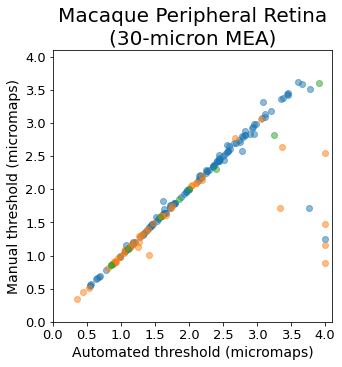

In [91]:
fig, ax = plt.subplots(1, 1, figsize = (5,5))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
compartment_list = np.array(compartment_list)

mt = np.array(manual_threshold)
mt[mt>=4]=4
mt[mt==0]=4
gt = np.array(gsort_threshold)
gt[gt>=4]=4
gt[gt==0]=4

ax.scatter(gt[compartment_list == 'soma'], mt[compartment_list == 'soma'], alpha = 0.5, color = "C0")
ax.scatter(gt[compartment_list == 'axon'], mt[compartment_list == 'axon'], alpha = 0.5, color = "C1")
ax.scatter(gt[compartment_list == 'mixed'], mt[compartment_list == 'mixed'], alpha = 0.5, color = "C2")

diff = np.abs(gt-mt)
ax.set_xlabel("Automated threshold (micromaps)", fontsize = 14)
ax.set_ylabel("Manual threshold (micromaps)", fontsize = 14)
ax.set_title("Macaque Peripheral Retina\n(30-micron MEA)", fontsize = 20)
# ax.scatter(gt, mt)

ax.set_ylim([0,4.1])
ax.set_xlim([0,4.1])

(0.5, 3.8145669291338584)

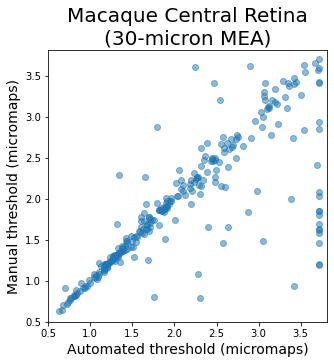

In [210]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))

window = 2.5
r_max_amp = rdf['max_amplitude'][0]
p_max_amp = pdf['max_amplitude'][0]

r_g = r_th_gsort[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
r_g[r_g<=0]=r_max_amp
r_g[r_g>=r_max_amp]=r_max_amp
r_m = r_th_manual[(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
r_m[r_m<=0]=0
r_m[r_m>=r_max_amp]=r_max_amp

ax.scatter( r_g,r_m , alpha = 0.5)

ax.set_xlabel("Automated threshold (micromaps)", fontsize = 14)
ax.set_ylabel("Manual threshold (micromaps)", fontsize = 14)
ax.set_title("Macaque Central Retina\n(30-micron MEA)", fontsize = 20)
# ax.scatter(gt, mt)

ax.set_ylim([0.5,r_max_amp + 0.1])
ax.set_xlim([0.5, r_max_amp + 0.1])



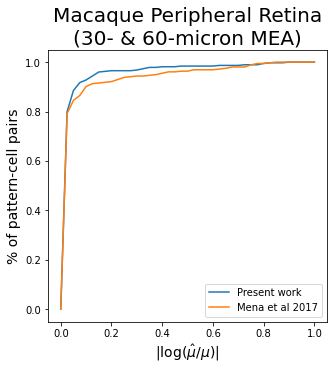

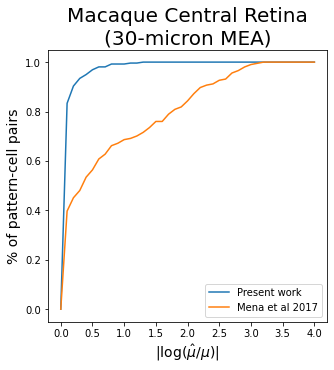

In [65]:
fig, ax1 = plt.subplots(1, 1, figsize = (5,5))
fig, ax2 = plt.subplots(1, 1, figsize = (5,5))
window = 2.5
r_max_amp = rdf['max_amplitude'][0]
p_max_amp = pdf['max_amplitude'][0]

r_g = r_th_gsort[(r_th_gsort>0)&(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
# r_g[r_g<=0]=r_max_amp
# r_g[r_g>=r_max_amp]=p_max_amp
r_m = r_th_manual[(r_th_gsort>0)&(r_th_gsort<rdf['max_amplitude'][0] )&(r_th_manual <rdf['max_amplitude'][0])&(r_th_manual!= 0)]
# r_m[r_m<=0]=0

p_g = p_th_gsort[(p_th_gsort>0)&(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
# p_g[p_g<=0]=p_max_amp
# p_g[p_g>=p_max_amp]=p_max_amp
p_m = p_th_manual[(p_th_gsort>0)&(p_th_gsort<pdf['max_amplitude'][0] )&(p_th_manual <pdf['max_amplitude'][0])&(p_th_manual!= 0)]
# p_m[p_m<=0]=0
cat_diff = np.concatenate((cen_diff, per_diff))
# cat_diff[cat_diff>=1]=1


r_a = r_th_autosort[(r_th_autosort>0)&(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_a[r_a<=0]=r_max_amp
r_a[r_a>=r_max_amp]=p_max_amp
r_ma = r_th_manual_autosort[(r_th_autosort>0)&(r_th_autosort<rdf['max_amplitude'][0])&(r_th_manual_autosort <rdf['max_amplitude'][0])&(r_th_manual_autosort!= 0)]
r_ma[r_ma<=0]=0
p_a = p_th_autosort[(p_th_autosort>0)&(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_a[p_a<=0]=p_max_amp
p_a[p_a>=p_max_amp]=p_max_amp
p_ma = p_th_manual_autosort[(p_th_autosort>0)&(p_th_autosort<pdf['max_amplitude'][0])&(p_th_manual_autosort <pdf['max_amplitude'][0])&(p_th_manual_autosort!= 0)]
p_ma[p_ma<=0]=0


x, b = np.histogram(np.abs(np.log(r_g/r_m)), bins = 40, range = (-0, 4))

ax2.plot(b, np.r_[0,np.cumsum(x)/np.sum(x)], label = "Present work")

x, b = np.histogram(np.abs(np.log(r_a/r_ma)), bins = 40, range = (-0, 4))

ax2.plot(b, np.r_[0,np.cumsum(x)/np.sum(x)], label = "Mena et al 2017")
ax2.set_title("Macaque Central Retina\n(30-micron MEA)", fontsize = 20)

x, b = np.histogram(np.abs(np.log(p_g/p_m)), bins = 40, range = (-0, 1))

ax1.plot(b,np.r_[0,np.cumsum(x)/np.sum(x)], label = "Present work")

x, b = np.histogram(np.abs(np.log(p_a/p_ma)), bins = 40, range = (-0, 1))

ax1.plot(b,np.r_[0,np.cumsum(x)/np.sum(x)], label = "Mena et al 2017")
ax2.legend()
ax1.set_title("Macaque Peripheral Retina\n(30- & 60-micron MEA)", fontsize = 20)
# fig.suptitle("Cumulative density of threshold log ratio ")
ax1.set_xlabel(r'$\vert\log(\hat{\mu} /\mu)\vert$', fontsize = 14)
ax2.set_xlabel(r'$\vert\log(\hat{\mu} /\mu)\vert$', fontsize = 14)
ax1.set_ylabel("% of pattern-cell pairs", fontsize = 14)
ax2.set_ylabel("% of pattern-cell pairs", fontsize = 14)
ax1.legend()

In [58]:
plt.rcParams['text.usetex'] = False